# **Presentación del proyecto**

###**Abstracto con Motivación y Audiencia**

**Motivación:** La diabetes es una de las enfermedades crónicas más prevalentes y de rápido crecimiento a nivel mundial. Detectarla en etapas tempranas es fundamental para prevenir complicaciones graves, mejorar la calidad de vida y reducir los costos de atención médica. Con el aumento de los datos de salud disponibles, la implementación de modelos predictivos puede contribuir de manera significativa al diagnóstico temprano.

**Audiencia:** Este proyecto está dirigido a profesionales de la salud, analistas de datos en el sector de bienestar, investigadores académicos y a cualquier persona interesada en el impacto de la diabetes en la salud pública. Además, los responsables de políticas de salud pueden beneficiarse de estos hallazgos para mejorar las estrategias de prevención.

###**Contexto Comercial y Analítico**

**Contexto Comercial:** El impacto económico de la diabetes es enorme. Los costos directos e indirectos relacionados con el tratamiento y las complicaciones derivadas de la diabetes pueden reducirse si la enfermedad se identifica antes de su aparición. Las organizaciones de salud pública, las aseguradoras y los centros de atención primaria de salud pueden beneficiarse de herramientas predictivas para personalizar los cuidados y reducir gastos a largo plazo.

**Contexto Analítico:** Utilizando el conjunto de datos NHANES (National Health and Nutrition Examination Survey), este proyecto analizará varios factores de riesgo como la edad, el IMC, niveles de glucosa, presión arterial, y hábitos de vida que puedan contribuir a predecir el riesgo de diabetes. A través de modelos de machine learning, identificaremos patrones que distinguen a personas con y sin riesgo de diabetes, proporcionando un modelo con capacidad predictiva.

###**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

- ¿Qué factores demográficos y biométricos (edad, IMC, presión arterial, nivel de ingresos, etc.) son más determinantes en el riesgo de diabetes?**
- ¿Existen patrones específicos en los niveles de glucosa y colesterol que permitan predecir la diabetes antes de que se diagnostique clínicamente?**
- ¿Es posible identificar subgrupos de alto riesgo dentro de la población encuestada que se beneficien de un seguimiento más intensivo?**
- ¿Cómo impactan los factores de estilo de vida, como la dieta y la actividad física, en la probabilidad de desarrollar diabetes?**


###**Objetivo**

El objetivo de este proyecto es desarrollar un modelo de machine learning que utilice los datos de NHANES para predecir el riesgo de diabetes en individuos basándose en sus datos de salud y estilo de vida. Este modelo será una herramienta de apoyo que permita a los profesionales de la salud identificar tempranamente a los pacientes en riesgo, optimizar la atención y mejorar las recomendaciones de prevención.


#**Presentación ejecutiva**

**Storytelling**    

https://github.com/CharlyRolando/CoderHouse_DataScienceII/blob/main/Entrega_final_Storytelling.pptx

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [125]:
import requests
import pandas as pd
from io import StringIO

**Configuración del entorno de Python en Google Colab**

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Lectura del dataset**

In [127]:
# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/CharlyRolando/CoderHouse_DataScienceII/refs/heads/main/Data/Diabetes_dataset.csv'

# Obtener el contenido del CSV
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido en un DataFrame
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)

    # Mostrar las primeras filas del DataFrame
    print(df.head())
else:
    print(f"Error al obtener el archivo: {response.status_code}")

    SEQN  Gender  AgeYears   EduLevelAdult  PeopleHH HHIncome  PovertyRatio  \
0  73557    Male      69.0  HighSchool/GED         3   15-20k          0.84   
1  73558    Male      54.0  HighSchool/GED         4   35-45k          1.78   
2  73559    Male      72.0      College/AA         2   65-75k          4.51   
3  73560    Male       9.9          3Grade         4   55-65k          2.52   
4  73561  Female      73.0   College/Above         2    >100k          5.00   

   BP Systolic  BP Dystolic  Weight  ...  LBXIN  LBXGLT  GTXDRANK  DSQIKCAL  \
0        122.0         76.0    78.3  ...  13.21  121.33      1.06     14.36   
1        156.0         80.0    89.5  ...  13.06  120.79      1.06     14.40   
2        140.0         76.0    88.9  ...   5.83  115.55      1.10     13.43   
3        108.0         34.0    32.2  ...    NaN     NaN       NaN       NaN   
4        136.0         88.0    52.0  ...  15.65  125.22      1.19     15.00   

   DSQIPROT  DSQICARB  DSQISUGR  DSQIFIBE  DSQITFA

**Análisis inicial del dataset**

In [128]:
# Totales (filas, columnas)
print(df.shape)

(10175, 26)


In [ ]:
# Muestra las primeras 5 filas
print(df.head())

# Muestra las últimas 5 filas
print(df.tail())

    SEQN  Gender  AgeYears   EduLevelAdult  PeopleHH HHIncome  PovertyRatio  \
0  73557    Male      69.0  HighSchool/GED         3   15-20k          0.84   
1  73558    Male      54.0  HighSchool/GED         4   35-45k          1.78   
2  73559    Male      72.0      College/AA         2   65-75k          4.51   
3  73560    Male       9.9          3Grade         4   55-65k          2.52   
4  73561  Female      73.0   College/Above         2    >100k          5.00   

   BP Systolic  BP Dystolic  Weight  ...  LBXIN  LBXGLT  GTXDRANK  DSQIKCAL  \
0        122.0         76.0    78.3  ...  13.21  121.33      1.06     14.36   
1        156.0         80.0    89.5  ...  13.06  120.79      1.06     14.40   
2        140.0         76.0    88.9  ...   5.83  115.55      1.10     13.43   
3        108.0         34.0    32.2  ...    NaN     NaN       NaN       NaN   
4        136.0         88.0    52.0  ...  15.65  125.22      1.19     15.00   

   DSQIPROT  DSQICARB  DSQISUGR  DSQIFIBE  DSQITFA

**Descripción del Dataset**

In [ ]:
# Muestra los nombres de las columnas
print(df.columns)

Index(['SEQN', 'Gender', 'AgeYears', 'EduLevelAdult', 'PeopleHH', 'HHIncome',
       'PovertyRatio', 'BP Systolic', 'BP Dystolic', 'Weight', 'Height', 'BMI',
       'SAD', 'is_diabetic', 'LBXTC', 'LBXGH', 'LBXIN', 'LBXGLT', 'GTXDRANK',
       'DSQIKCAL', 'DSQIPROT', 'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT',
       'DSQICHOL'],
      dtype='object')


###**Descripción de variables**

1. **SEQN**: Identificador único del participante en la encuesta.
2. **Gender**: Género del participante (Masculino/Femenino).
3. **AgeYears**: Edad en años.
4. **EduLevelAdult**: Nivel educativo alcanzado (Ej. HighSchool/GED, College/AA).
5. **PeopleHH**: Número de personas en el hogar.
6. **HHIncome**: Rango de ingresos del hogar.
7. **PovertyRatio**: Relación de ingresos con la línea de pobreza.
8. **BP Systolic**: Presión arterial sistólica (mmHg).
9. **BP Dystolic**: Presión arterial diastólica (mmHg).
10. **Weight**: Peso (kg).
11. **Height**: Altura (cm).
12. **BMI**: Índice de Masa Corporal.
13. **SAD**: Diámetro abdominal sagital (cm).
14. **is_diabetic**: Indicador de diabetes (1: diabético, 0: no diabético).
15. **LBXTC**: Colesterol total en sangre (mg/dL).
16. **LBXGH**: Glucosa en sangre en ayuno (mg/dL).
17. **LBXIN**: Insulina en sangre (uU/mL).
18. **LBXGLT**: Hemoglobina glucosilada (HbA1c).
19. **GTXDRANK**: Rango de Tolerancia a la Glucosa.
20. **DSQIKCAL**: Ingesta diaria de calorías (kcal).
21. **DSQIPROT**: Ingesta diaria de proteínas (g).
22. **DSQICARB**: Ingesta diaria de carbohidratos (g).
23. **DSQISUGR**: Ingesta diaria de azúcares (g).
24. **DSQIFIBE**: Ingesta diaria de fibra dietética (g).
25. **DSQITFAT**: Ingesta diaria de grasas totales (g).
26. **DSQICHOL**: Ingesta diaria de colesterol (mg).

In [ ]:
# Muestra un resumen del DataFrame, incluyendo tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQN           10175 non-null  int64  
 1   Gender         10175 non-null  object 
 2   AgeYears       10175 non-null  float64
 3   EduLevelAdult  8572 non-null   object 
 4   PeopleHH       10175 non-null  int64  
 5   HHIncome       10042 non-null  object 
 6   PovertyRatio   9390 non-null   float64
 7   BP Systolic    9813 non-null   float64
 8   BP Dystolic    9813 non-null   float64
 9   Weight         9813 non-null   float64
 10  Height         9813 non-null   float64
 11  BMI            9813 non-null   float64
 12  SAD            9813 non-null   float64
 13  is_diabetic    9813 non-null   float64
 14  LBXTC          6566 non-null   float64
 15  LBXGH          6566 non-null   float64
 16  LBXIN          6566 non-null   float64
 17  LBXGLT         6566 non-null   float64
 18  GTXDRA

In [ ]:
#Tipo de dato para cada columna
print(df.dtypes)

SEQN               int64
Gender            object
AgeYears         float64
EduLevelAdult     object
PeopleHH           int64
HHIncome          object
PovertyRatio     float64
BP Systolic      float64
BP Dystolic      float64
Weight           float64
Height           float64
BMI              float64
SAD              float64
is_diabetic      float64
LBXTC            float64
LBXGH            float64
LBXIN            float64
LBXGLT           float64
GTXDRANK         float64
DSQIKCAL         float64
DSQIPROT         float64
DSQICARB         float64
DSQISUGR         float64
DSQIFIBE         float64
DSQITFAT         float64
DSQICHOL         float64
dtype: object


###**Resumen estadístico de las columnas de tipo numérico:**


- **count:** Número total de valores no nulos.
- **mean:** Promedio de los valores.
- **std:** Desviación estándar.
- **min:** Valor mínimo.
- **25%, 50% (mediana), 75%:** Percentiles o cuartiles.
- **max:** Valor máximo.

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SEQN,10175.0,78644.00,2937.41,73557.00,76100.50,78644.00,81187.50,83731.00
AgeYears,10175.0,31.70,24.21,0.00,10.10,26.00,52.00,80.00
PeopleHH,10175.0,3.87,1.72,1.00,2.00,4.00,5.00,7.00
PovertyRatio,9390.0,2.25,1.63,0.00,0.87,1.70,3.61,5.00
BP Systolic,9813.0,114.76,17.63,66.00,103.02,112.00,124.00,228.00
BP Dystolic,9813.0,59.15,19.87,0.00,50.49,62.34,72.00,116.00
Weight,9813.0,62.52,32.29,3.10,37.90,65.20,83.30,222.60
Height,9813.0,151.36,27.95,79.70,141.50,160.80,170.20,202.60
BMI,9813.0,24.98,8.09,12.10,18.40,24.00,29.70,82.90
SAD,9813.0,19.40,5.74,10.00,14.50,19.00,23.40,40.20


###**Información relevante de variables categóricas:**

- **count:** Número de valores no nulos.
- **unique:** Número de valores únicos.
- **top:** Valor más frecuente.
- **freq:** Frecuencia del valor más frecuente.

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Gender,10175,2,Female,5172
EduLevelAdult,8572,24,College/AA,1770
HHIncome,10042,16,>100k,1781


# **Exploración inicial de los datos**

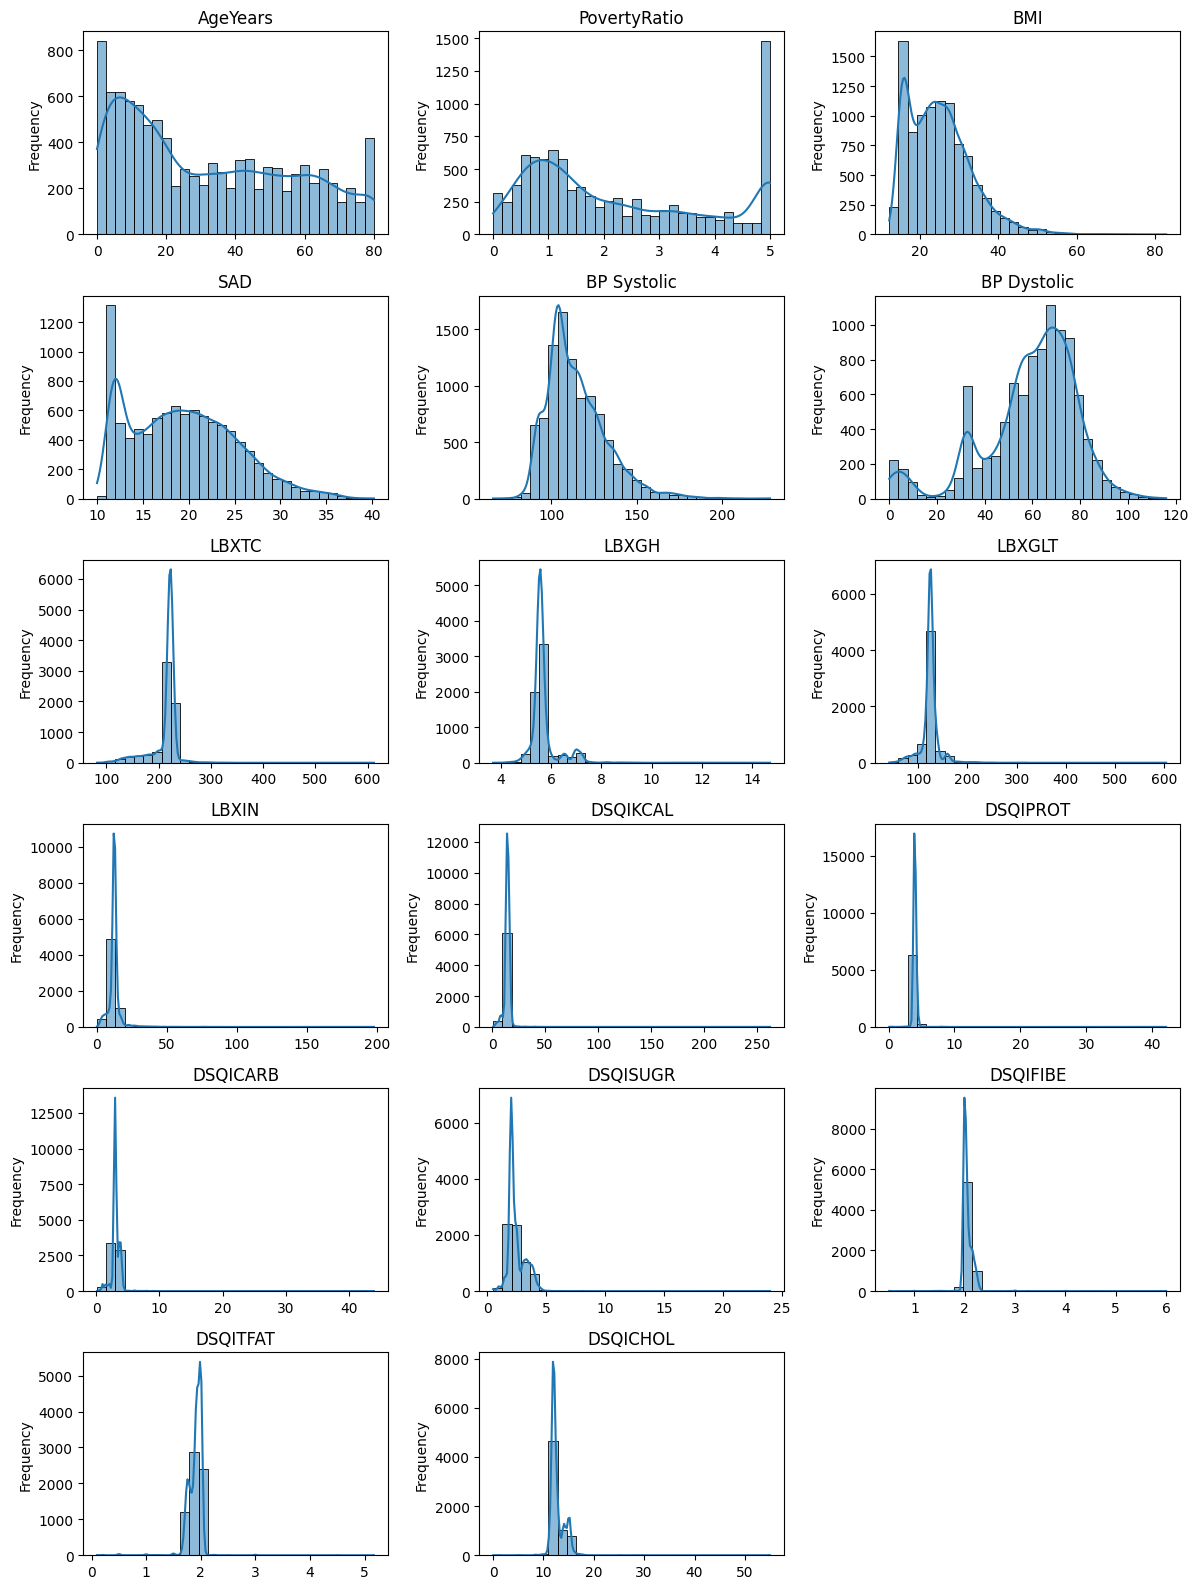

In [ ]:
# Histogramas
# Definir una lista de las columnas para las que quieres hacer histogramas
variables = [
    'AgeYears', 'PovertyRatio', 'BMI', 'SAD', 'BP Systolic', 'BP Dystolic',
    'LBXTC', 'LBXGH', 'LBXGLT', 'LBXIN', 'DSQIKCAL', 'DSQIPROT',
    'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 16))

# Crear un histograma para cada variable en un bucle
for i, column in enumerate(variables, 1):
    plt.subplot(6, 3, i)  # Crear una cuadrícula de subplots de 6 filas x 3 columnas
    sns.histplot(df[column], bins=30, kde=True)  # Histograma con línea KDE (densidad estimada)
    plt.title(column)  # Título con el nombre de la columna
    plt.xlabel("")     # Sin etiqueta en el eje X para simplificar
    plt.ylabel("Frequency")  # Etiqueta en el eje Y

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


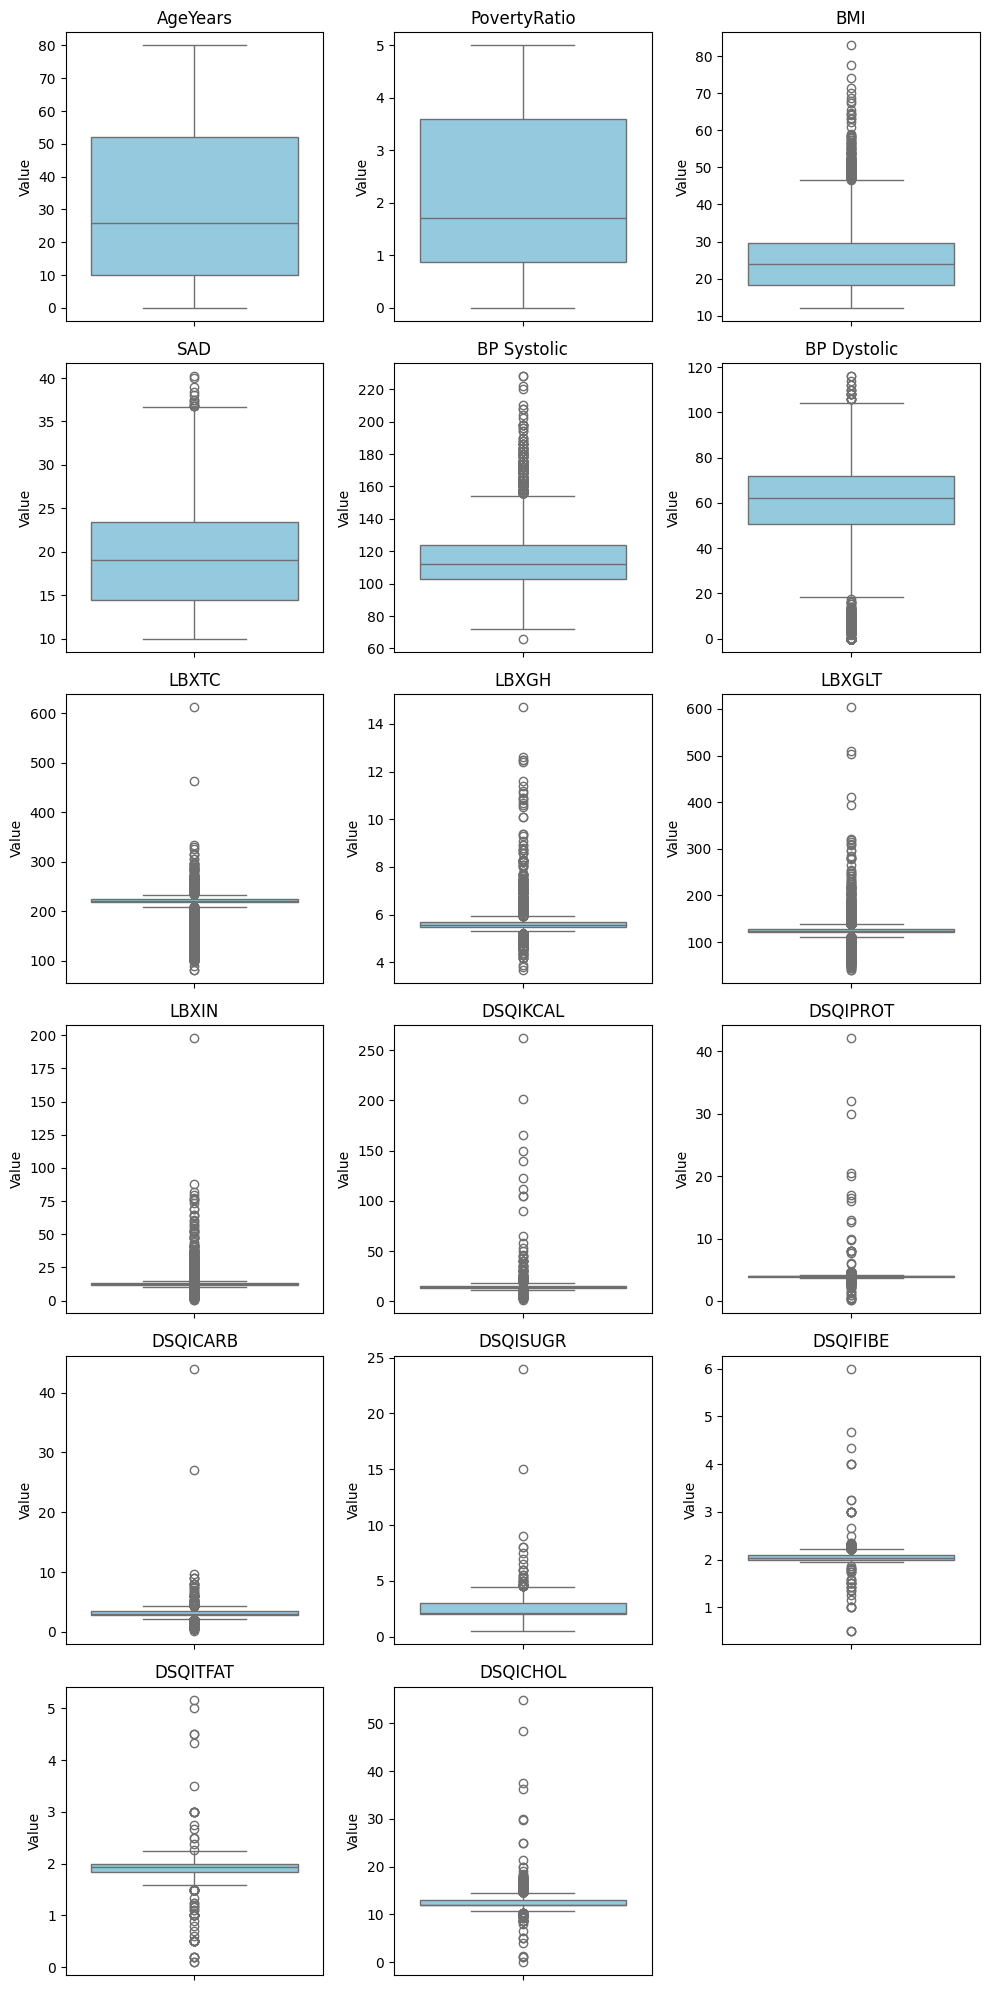

In [ ]:
# Boxplots

# Lista de las columnas para las que queremos crear boxplots
variables = [
    'AgeYears', 'PovertyRatio', 'BMI', 'SAD', 'BP Systolic', 'BP Dystolic',
    'LBXTC', 'LBXGH', 'LBXGLT', 'LBXIN', 'DSQIKCAL', 'DSQIPROT',
    'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 20))

# Crear un boxplot para cada variable en un bucle
for i, column in enumerate(variables, 1):
    plt.subplot(6, 3, i)  # Crear una cuadrícula de subplots de 6 filas x 3 columnas
    sns.boxplot(data=df[column], color="skyblue")  # Boxplot
    plt.title(column)  # Título con el nombre de la columna
    plt.xlabel("")     # Sin etiqueta en el eje X para simplificar
    plt.ylabel("Value")  # Etiqueta en el eje Y

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


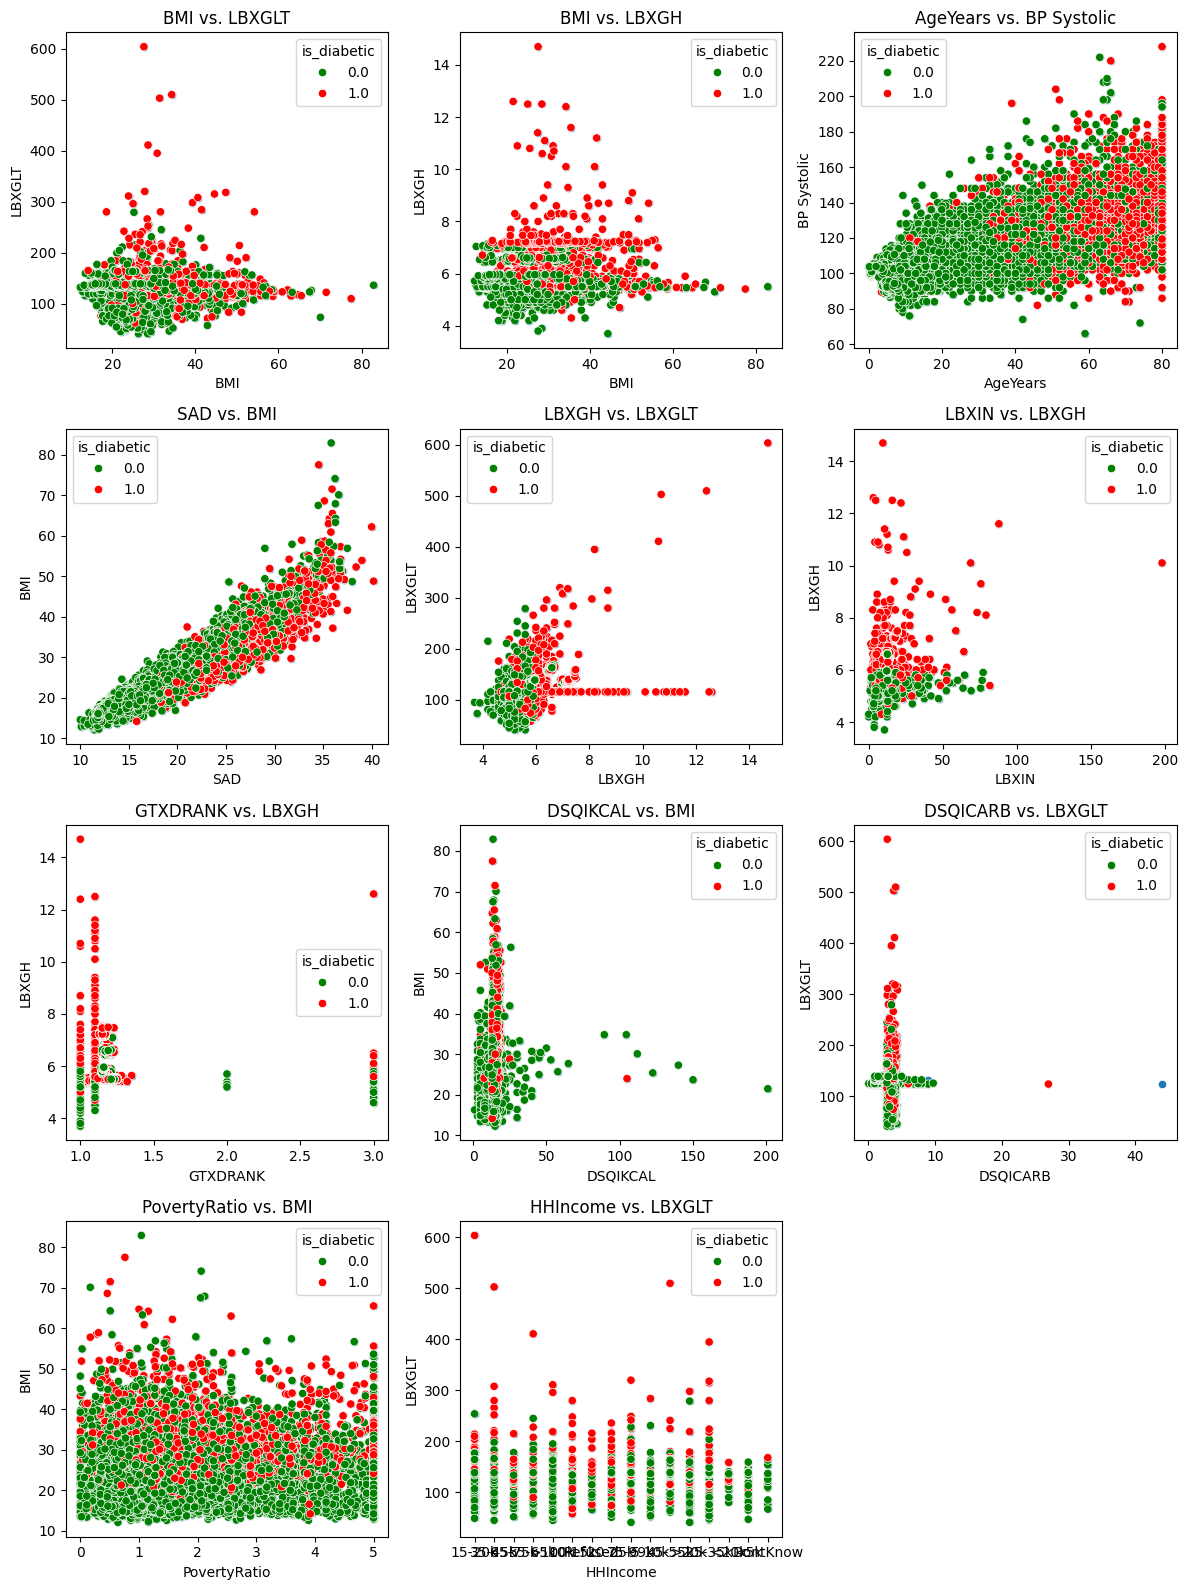

In [ ]:
# Scatterplots

# Pares de variables para hacer scatterplots
variable_pairs = [
    ('BMI', 'LBXGLT'), ('BMI', 'LBXGH'), ('AgeYears', 'BP Systolic'),
    ('SAD', 'BMI'), ('LBXGH', 'LBXGLT'), ('LBXIN', 'LBXGH'),
    ('GTXDRANK', 'LBXGH'), ('DSQIKCAL', 'BMI'), ('DSQICARB', 'LBXGLT'),
    ('PovertyRatio', 'BMI'), ('HHIncome', 'LBXGLT')
]

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 16))

# Crear un scatterplot para cada par de variables
for i, (x_var, y_var) in enumerate(variable_pairs, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de subplots de 4 filas x 3 columnas
    sns.scatterplot(data=df, x=x_var, y=y_var)
    sns.scatterplot(data=df, x=x_var, y=y_var, hue='is_diabetic', palette={0: 'green', 1: 'red'})
    plt.title(f'{x_var} vs. {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()



In [ ]:
# Coeficiente de Pearson

from scipy.stats import pearsonr

# Seleccionar las dos columnas de interés
x = df['BMI']
y = df['LBXGLT']

# Combinar las dos columnas en un DataFrame y eliminar las filas con NaN o inf
filtered_data = df[['BMI', 'LBXGLT']].replace([float('inf'), -float('inf')], float('nan')).dropna()

# Calcular el coeficiente de Pearson con los datos filtrados
coef, p_value = pearsonr(filtered_data['BMI'], filtered_data['LBXGLT'])
print(f"Coeficiente de Pearson: {coef}")
print(f"Valor p: {p_value}")



Coeficiente de Pearson: 0.043131505753530704
Valor p: 0.0005768566293499468


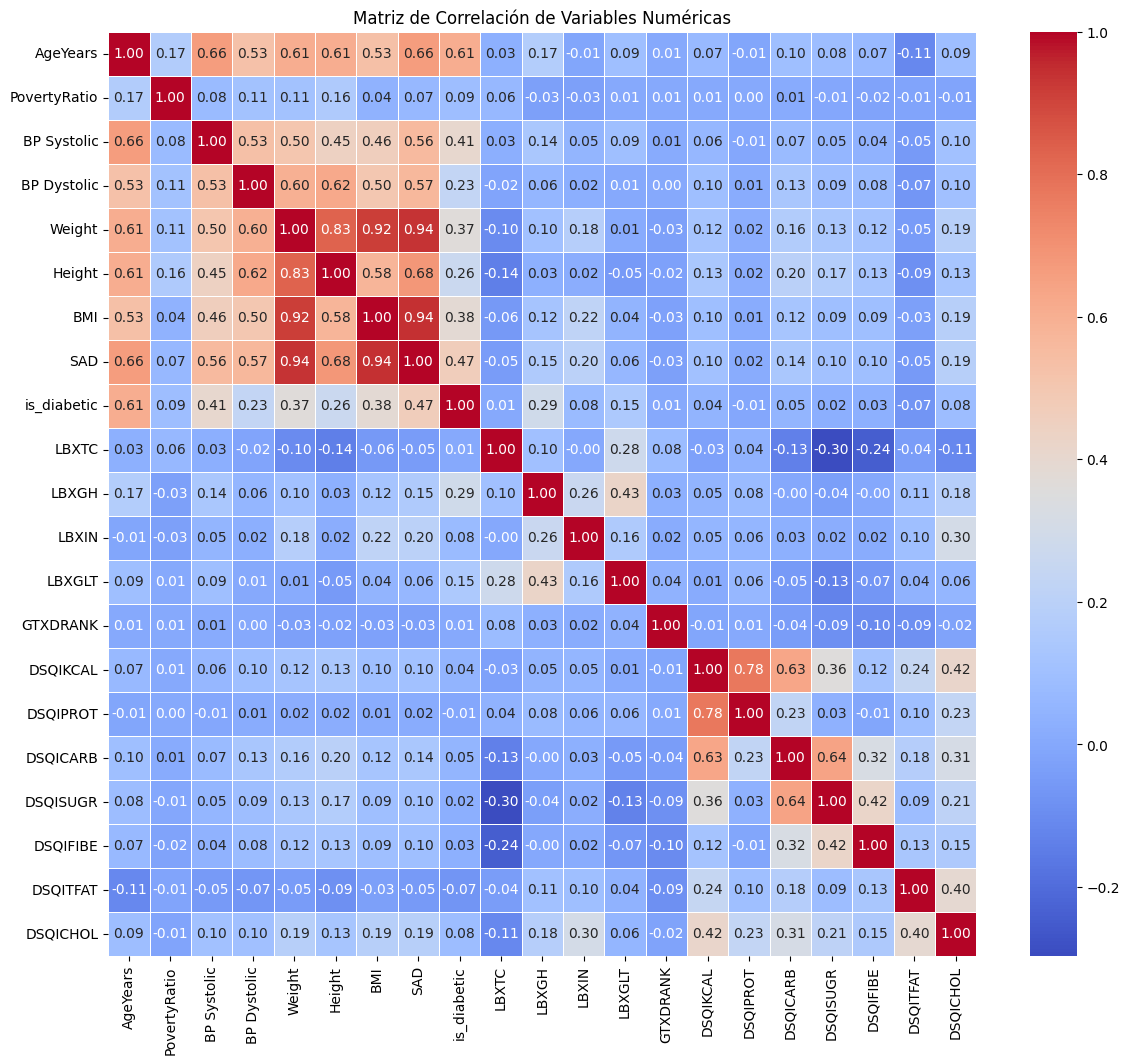

In [ ]:
# Matriz de Correlación

# Convertir las variables categóricas a valores numéricos
df['is_diabetic'] = df['is_diabetic'].map({1: 1, 0: 0})  # No es necesario, pero por claridad

# Seleccionar solo las variables numéricas relevantes
numeric_columns = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic',
    'Weight', 'Height', 'BMI', 'SAD', 'is_diabetic', 'LBXTC', 'LBXGH',
    'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL', 'DSQIPROT', 'DSQICARB',
    'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

df_numeric = df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()



# **Data Wrangling - Limpieza y transformación de datos**

<br>     
**Valores duplicados**  


No se observan registros duplicados.

In [ ]:
# Mostrar solo las filas duplicadas
print(df[df.duplicated()])

Empty DataFrame
Columns: [SEQN, Gender, AgeYears, EduLevelAdult, PeopleHH, HHIncome, PovertyRatio, BP Systolic, BP Dystolic, Weight, Height, BMI, SAD, is_diabetic, LBXTC, LBXGH, LBXIN, LBXGLT, GTXDRANK, DSQIKCAL, DSQIPROT, DSQICARB, DSQISUGR, DSQIFIBE, DSQITFAT, DSQICHOL]
Index: []

[0 rows x 26 columns]


<br>    
**Valores nulos**

In [ ]:
# Filtrar y mostrar solo las columnas con valores nulos
print(df.isnull().sum()[df.isnull().sum() > 0])


EduLevelAdult    1603
HHIncome          133
PovertyRatio      785
BP Systolic       362
BP Dystolic       362
Weight            362
Height            362
BMI               362
SAD               362
is_diabetic       362
LBXTC            3609
LBXGH            3609
LBXIN            3609
LBXGLT           3609
GTXDRANK         3609
DSQIKCAL         3609
DSQIPROT         3609
DSQICARB         3609
DSQISUGR         3609
DSQIFIBE         3609
DSQITFAT         3609
DSQICHOL         3609
dtype: int64


<br>*EduLevelAdult (Nivel educativo):*

In [129]:
# Lista de valores únicos en 'EduLevelAdult'
valores_unicos = df['EduLevelAdult'].unique()
print(valores_unicos)

['HighSchool/GED' 'College/AA' '3Grade' 'College/Above' nan '9-11Grade'
 '2Grade' '4Grade' '9Grade' '>9Grade' '>HighSchool' '6Grade' '1Grade'
 '7Grade' '8Grade' 'NoEdu/KG' '5Grade' '10Grade' '11Grade' 'HighSchool'
 '12Grade' 'GED' '>5Grade' 'DontKnow' 'Refused']


- **NA:** No aplica. Indica que la educación no aplica a la persona en cuestión (por ejemplo, por su edad o situación particular).  
- **DontKnow:** No sabe. La persona no sabe o no recuerda su nivel educativo.  
- **Refused:** Rechazó responder. La persona se negó a proporcionar información sobre su nivel educativo.  
- **NoEdu/KG:** Sin educación formal o Kindergarten. La persona no ha recibido educación formal o solo ha completado el nivel de jardín de niños (Kindergarten).  
- **1Grade a 12Grade:** Primer grado a duodécimo grado. Cada término representa el nivel de grado completado, desde primero hasta duodécimo. Esto cubre los grados típicos de la educación primaria y secundaria.  
- **9-11Grade:** Noveno a undécimo grado. Indica que la persona completó entre el noveno y el undécimo grado, pero no llegó al duodécimo.  
- **>5Grade:** Más allá del quinto grado. La persona completó un nivel superior al quinto grado.  
- **>9Grade:** Más allá del noveno grado. La persona completó un nivel superior al noveno grado.  
- **HighSchool:** Escuela secundaria. La persona completó el nivel de escuela secundaria.  
- **GED:** Examen de Equivalencia de la Educación Secundaria (General Educational Development). La persona no completó la escuela secundaria tradicional, pero obtuvo un certificado de equivalencia de educación secundaria.  
- **HighSchool/GED:** Escuela secundaria o GED. La persona completó la escuela secundaria o su equivalente (GED).  
- **>HighSchool:** Más allá de la escuela secundaria. La persona completó educación superior a la escuela secundaria, lo que puede incluir estudios universitarios o técnicos.  
- **College/AA:** Estudios universitarios o Asociado (Associate’s Degree). La persona completó estudios en una universidad o instituto de educación superior, y puede haber obtenido un título de asociado, que es un título de dos años en algunos sistemas educativos.  
- **College/Above:** Estudios universitarios avanzados. La persona completó estudios universitarios y podría haber obtenido un título superior a asociado, como una licenciatura o un título de posgrado.  


1- La Clasificación está muy atomizada.  
2- Presenta 1603 registros nulos.  
3- Es una información demográfica que no tiene un gran impacto en la enfermedad.   

Por todo esto consideramos ineficaz hacer una transformación de datos para minimizarlos.  
Se decide eliminar la variable.


In [130]:
# Eliminar la columna 'EduLevelAdult'
df = df.drop(columns=['EduLevelAdult'])

<br>*PeopleHH (Número de personas en el hogar):*  

No aplica para las predicciones, se elimina.

In [131]:
# Eliminar la columna 'PeopleHH'
df = df.drop(columns=['PeopleHH'])

<br>*HHIncome (Rango de ingresos del hogar):*  

1- No son valores numéricos, son textos con el sufijo 'k' por miles.  
2- Tiene 133 registros nulos.  
3- El 'PovertyRatio' es una mejor variable.  
Se decide eliminar la columna.

In [132]:
# Eliminar la columna 'HHIncome'
df = df.drop(columns=['HHIncome'])

<br>*SEQN (Identificador único)*  

No aplica para las predicciones, se elimina.

In [133]:
# Eliminar la columna 'SEQN'
df = df.drop(columns=['SEQN'])

<br>*PovertyRatio (Relación de ingresos con la línea de pobreza):*  

Presenta 785 registros nulos pero es un dato demográfico que podría insidir en las predicciones.  
Se decide reemplazar los nulos por la 'media' de la variable.  


In [134]:
# Calcular la media de la columna 'PovertyRatio'
media_poverty_ratio = df['PovertyRatio'].mean().round(2)

# Reemplazar los valores nulos sin usar 'inplace'
df['PovertyRatio'] = df['PovertyRatio'].fillna(media_poverty_ratio)

# Redondear la columna 'PovertyRatio' a dos decimales
df['PovertyRatio'] = df['PovertyRatio'].round(2)

<br>*Gender (Género Masculino/Femenino)*  

Reemplazo por valores numéricos:
- **1:** Male.  
- **2:** Female.

In [135]:
# En 'Gender' reemplazar 'Male' con 1 y 'Female' con 0

# Reemplazar valores y convertir a entero explícitamente
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)


<ipython-input-135-5038c84dee40>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)


<br>     
*BP Dystolic (Presión arterial diastólica)*    

Hay valores en 0: los reemplazo por la 'media'

In [ ]:
# Filtrar los registros donde 'BP Dystolic' es igual a 0
registros_con_cero = df[df['BP Dystolic'] == 0]

# Mostrar los registros
print(registros_con_cero)


       Gender  AgeYears  PovertyRatio  BP Systolic  BP Dystolic  Weight  \
31          1      11.7          1.54        100.0          0.0    31.5   
90          0      61.0          3.53        112.0          0.0    74.2   
155         1      18.7          5.00        114.0          0.0    85.1   
174         1      12.8          4.61         94.0          0.0    45.4   
207         1      13.2          2.51        108.0          0.0    54.9   
...       ...       ...           ...          ...          ...     ...   
9782        1      12.1          1.34         94.0          0.0    37.5   
9889        1      68.0          0.21        148.0          0.0    83.3   
9922        0       8.1          0.02         90.0          0.0    19.5   
10026       1      20.0          1.20        118.0          0.0   116.5   
10147       1      15.2          0.00        108.0          0.0   115.8   

       Height   BMI    SAD  is_diabetic  ...  LBXIN  LBXGLT  GTXDRANK  \
31      141.5  15.7  13.80

In [136]:
# Calcular la media de la columna 'BP Dystolic', ignorando los ceros
media_bp_dystolic = df['BP Dystolic'][df['BP Dystolic'] != 0].mean()

# Reemplazar los valores 0 en la columna 'BP Dystolic' por la media
df['BP Dystolic'] = df['BP Dystolic'].replace(0, media_bp_dystolic)


<br>  
*DSQICHOL (Ingesta diaria de colesterol)*   

Hay valores en 0: los reemplazo por la 'media'

In [137]:
# Filtrar los registros donde 'DSQICHOL' es igual a 0
registros_con_cero = df[df['DSQICHOL'] == 0]

# Mostrar los registros
print(registros_con_cero)


      Gender  AgeYears  PovertyRatio  BP Systolic  BP Dystolic  Weight  \
6691       0      29.0           5.0         94.0         68.0    63.1   

      Height   BMI   SAD  is_diabetic  ...  LBXIN  LBXGLT  GTXDRANK  DSQIKCAL  \
6691   169.0  22.1  17.0          0.0  ...   12.3  124.55      1.15      15.0   

      DSQIPROT  DSQICARB  DSQISUGR  DSQIFIBE  DSQITFAT  DSQICHOL  
6691       1.2       2.3       2.0       2.0       0.1       0.0  

[1 rows x 22 columns]


In [138]:
# Calcular la media de la columna 'DSQICHOL', ignorando los ceros
media_DSQICHOL = df['DSQICHOL'][df['DSQICHOL'] != 0].mean()

# Reemplazar los valores 0 en la columna 'DSQICHOL' por la media
df['DSQICHOL'] = df['DSQICHOL'].replace(0, media_DSQICHOL)

<br>*Eliminar los nulos restantes*

In [139]:
# Estado previo
print(df.isnull().sum())
print("")
print("Antes: ", df.shape)

# Eliminar las filas con cualquier valor nulo
df = df.dropna()

print("")
print("Después:", df.shape)

Gender             0
AgeYears           0
PovertyRatio       0
BP Systolic      362
BP Dystolic      362
Weight           362
Height           362
BMI              362
SAD              362
is_diabetic      362
LBXTC           3609
LBXGH           3609
LBXIN           3609
LBXGLT          3609
GTXDRANK        3609
DSQIKCAL        3609
DSQIPROT        3609
DSQICARB        3609
DSQISUGR        3609
DSQIFIBE        3609
DSQITFAT        3609
DSQICHOL        3609
dtype: int64

Antes:  (10175, 22)

Después: (6366, 22)


In [ ]:
# Totales (filas, columnas)
print(df.shape)
print("")
print(df.info())

(10175, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        10175 non-null  int64  
 1   AgeYears      10175 non-null  float64
 2   PovertyRatio  9390 non-null   float64
 3   BP Systolic   9813 non-null   float64
 4   BP Dystolic   9813 non-null   float64
 5   Weight        9813 non-null   float64
 6   Height        9813 non-null   float64
 7   BMI           9813 non-null   float64
 8   SAD           9813 non-null   float64
 9   is_diabetic   9813 non-null   float64
 10  LBXTC         6566 non-null   float64
 11  LBXGH         6566 non-null   float64
 12  LBXIN         6566 non-null   float64
 13  LBXGLT        6566 non-null   float64
 14  GTXDRANK      6566 non-null   float64
 15  DSQIKCAL      6566 non-null   float64
 16  DSQIPROT      6566 non-null   float64
 17  DSQICARB      6566 non-null   float64
 18  DSQISUGR      

<br>   
*Repito los histogramas con los datos depurados*

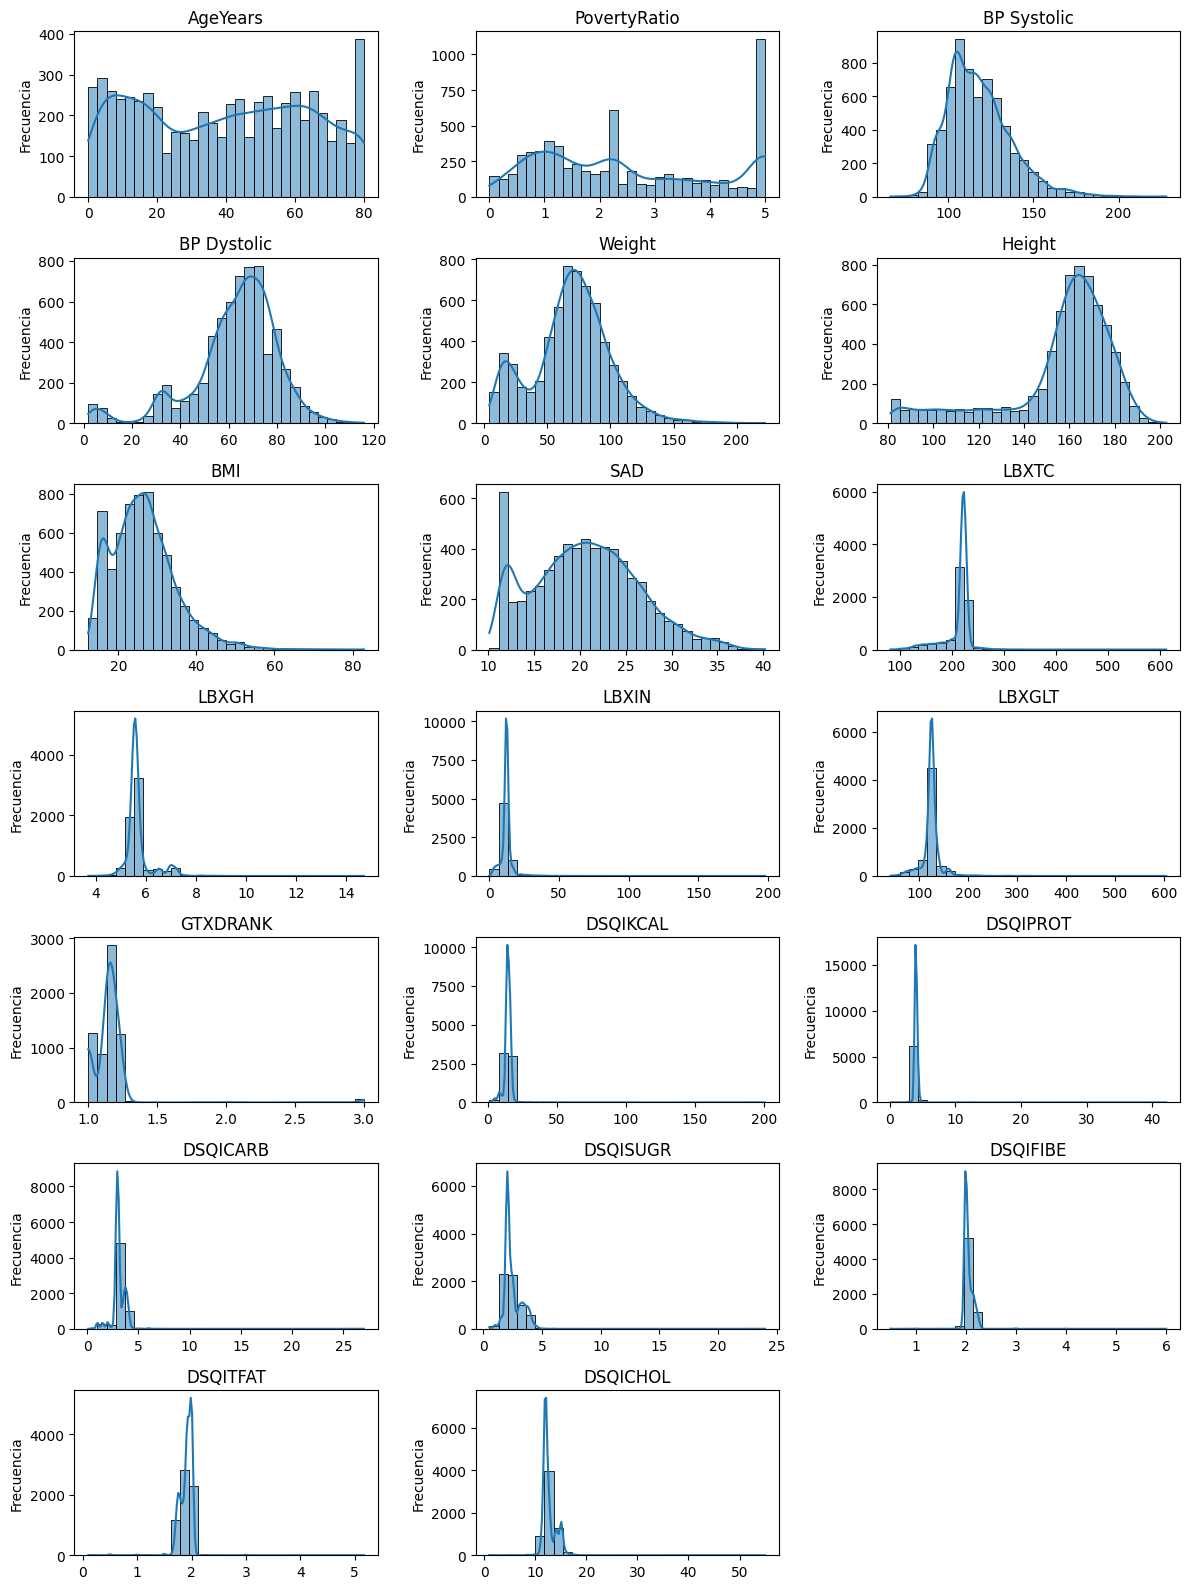

In [ ]:
# Histogramas
# Definir una lista de las columnas para las que quieres hacer histogramas
variables = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic',
    'Weight', 'Height', 'BMI', 'SAD', 'LBXTC', 'LBXGH',
    'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL', 'DSQIPROT', 'DSQICARB',
    'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]
#variables = df.select_dtypes(include=['int', 'float']).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 16))

# Crear un histograma para cada variable en un bucle
for i, column in enumerate(variables, 1):
    plt.subplot(7, 3, i)  # Crear una cuadrícula de subplots de 7 filas x 3 columnas
    sns.histplot(df[column], bins=30, kde=True)  # Histograma con línea KDE (densidad estimada)
    plt.title(column)  # Título con el nombre de la columna
    plt.xlabel("")     # Sin etiqueta en el eje X para simplificar
    plt.ylabel("Frecuencia")  # Etiqueta en el eje Y

plt.tight_layout()  # Ajustar el diseño para que no se superpongan los gráficos
plt.show()


**Tratamiento de valores outliers**

In [140]:

# Definir las columnas numéricas
numeric_columns = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic',
    'Weight', 'Height', 'BMI', 'SAD', 'LBXTC', 'LBXGH',
    'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL', 'DSQIPROT', 'DSQICARB',
    'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Iterar sobre las columnas numéricas y detectar outliers
outliers = {}

for column in numeric_columns:
    # Calcular Q1, Q3 y el IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Detectar los outliers en cada columna
    outliers[column] = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

# Mostrar los outliers detectados para cada columna
for column, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f'Outliers en la columna: {column}')
        print(outlier_data[[column]].head())  # Muestra los primeros outliers de la columna
        print('-' * 50)
    else:
        print(f'No hay outliers en la columna: {column}')
        print('-' * 50)



No hay outliers en la columna: AgeYears
--------------------------------------------------
No hay outliers en la columna: PovertyRatio
--------------------------------------------------
Outliers en la columna: BP Systolic
     BP Systolic
95         176.0
105        196.0
133        168.0
136        174.0
152        168.0
--------------------------------------------------
Outliers en la columna: BP Dystolic
     BP Dystolic
26          5.75
29          4.63
63         26.96
105       108.00
107         5.51
--------------------------------------------------
Outliers en la columna: Weight
     Weight
181   155.8
221   161.8
240   180.1
248   140.2
342   140.6
--------------------------------------------------
Outliers en la columna: Height
    Height
18  102.42
26  116.90
29  109.40
51   93.30
54   91.50
--------------------------------------------------
Outliers en la columna: BMI
      BMI
145  46.2
221  52.3
240  64.7
243  54.2
248  49.9
----------------------------------------------

*Los valores outliers detectados no parecen ser errores de relevamiento, todos se encuentran dentro de valores posibles.*   
Por lo tanto se decide mantenerlos.

# **Análisis Exploratorio de datos**

**Análisis univariado**

*1. Distribución de Edad (AgeYears)*

Estadísticas descriptivas de la edad:
count    6366.000000
mean       39.330820
std        24.371254
min         0.000000
25%        16.400000
50%        40.000000
75%        60.000000
max        80.000000
Name: AgeYears, dtype: float64


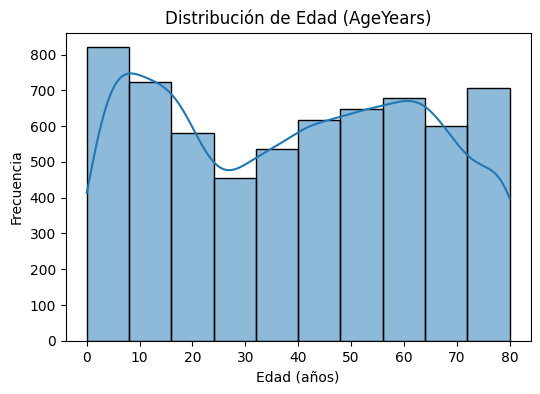

In [ ]:
# Análisis de la variable AgeYears
print("Estadísticas descriptivas de la edad:")
print(df['AgeYears'].describe())

# Histograma de la distribución de edades
plt.figure(figsize=(6, 4))
sns.histplot(df['AgeYears'], kde=True, bins=10)
plt.title("Distribución de Edad (AgeYears)")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.show()


<br>     
*2. Análisis de Género (Gender)*

Distribución de Género:
Gender
0    3396
1    2970
Name: count, dtype: int64


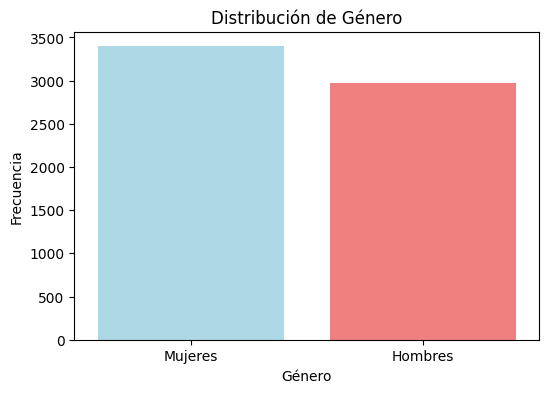

In [ ]:
# Conteo de frecuencias para Gender
print("Distribución de Género:")
print(df['Gender'].value_counts())

# Diagrama de barras para la variable Gender
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, color='lightblue')  # Coloca un color inicial para la primera barra
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")

# Cambiar el color de las barras
for i, bar in enumerate(ax.patches):
    if i == 0:  # Primera barra (Mujer)
        bar.set_facecolor('lightblue')  # Color para Mujer
    else:  # Segunda barra (Hombre)
        bar.set_facecolor('lightcoral')  # Color para Hombre

# Cambiar las etiquetas del eje X
ax.set_xticks([0, 1])  # Asegura que hay ticks en las posiciones 0 y 1
ax.set_xticklabels(['Mujeres', 'Hombres'])  # Asigna nuevas etiquetas

plt.show()


<br>    
*3. Análisis de Presión Arterial Sistólica y Diastólica (BP Systolic, BP Dystolic)*

Estadísticas descriptivas de la Presión Arterial Sistólica:
count    6366.000000
mean      118.015413
std        18.483156
min        66.000000
25%       104.000000
50%       116.000000
75%       128.000000
max       228.000000
Name: BP Systolic, dtype: float64

Estadísticas descriptivas de la Presión Arterial Diastólica:
count    6366.000000
mean       63.081564
std        17.583769
min         1.890000
25%        56.000000
50%        66.000000
75%        74.000000
max       116.000000
Name: BP Dystolic, dtype: float64


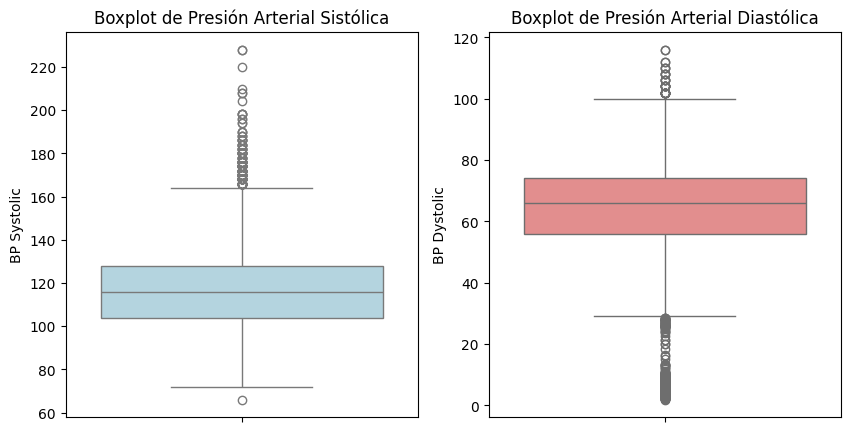

In [ ]:
# Estadísticas descriptivas para BP Systolic y BP Dystolic
print("Estadísticas descriptivas de la Presión Arterial Sistólica:")
print(df['BP Systolic'].describe())
print("\nEstadísticas descriptivas de la Presión Arterial Diastólica:")
print(df['BP Dystolic'].describe())

# Boxplot para detectar posibles valores atípicos
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='BP Systolic', data=df, color='lightblue')
plt.title("Boxplot de Presión Arterial Sistólica")

plt.subplot(1, 2, 2)
sns.boxplot(y='BP Dystolic', data=df, color='lightcoral')
plt.title("Boxplot de Presión Arterial Diastólica")
plt.show()


<br>   
*4. Análisis del Índice de Masa Corporal (BMI)*

Estadísticas descriptivas del Índice de Masa Corporal (BMI):
count    6366.000000
mean       26.425803
std         8.102789
min        12.300000
25%        20.700000
50%        25.800000
75%        30.900000
max        82.900000
Name: BMI, dtype: float64


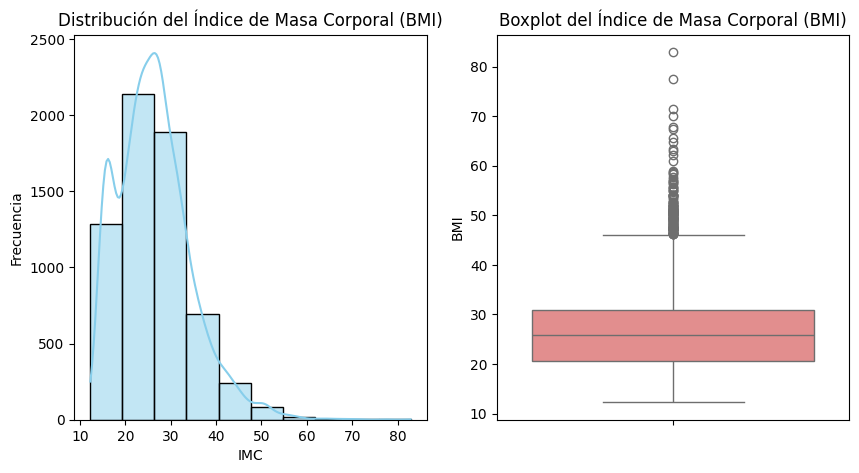

In [ ]:
# Estadísticas descriptivas del IMC
print("Estadísticas descriptivas del Índice de Masa Corporal (BMI):")
print(df['BMI'].describe())

# Histograma y Boxplot para analizar la distribución del IMC
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=10, color='skyblue')
plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.boxplot(y='BMI', data=df, color='lightcoral')
plt.title("Boxplot del Índice de Masa Corporal (BMI)")
plt.show()


<br>    
*5. Estado de Diabetes (is_diabetic)*

Distribución del estado de diabetes:
is_diabetic
0.0    69.384229
1.0    30.615771
Name: proportion, dtype: float64


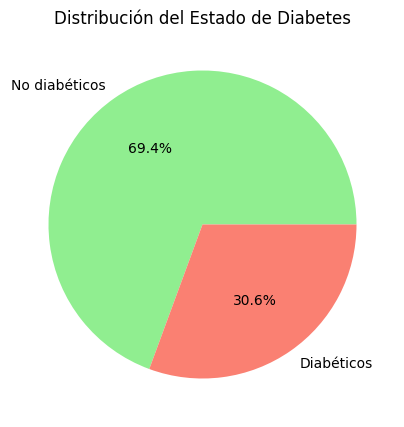

In [ ]:
# Conteo de frecuencias para is_diabetic
print("Distribución del estado de diabetes:")
print(df['is_diabetic'].value_counts(normalize=True) * 100)

# Diagrama de torta para la variable is_diabetic con etiquetas personalizadas
plt.figure(figsize=(5, 5))
df['is_diabetic'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    labels=['No diabéticos', 'Diabéticos']  # Etiquetas personalizadas
)
plt.title("Distribución del Estado de Diabetes")
plt.ylabel("")
plt.show()


**Análisis bivariado**

*1. Relación entre Edad y Presión Arterial Sistólica (AgeYears y BP Systolic)*

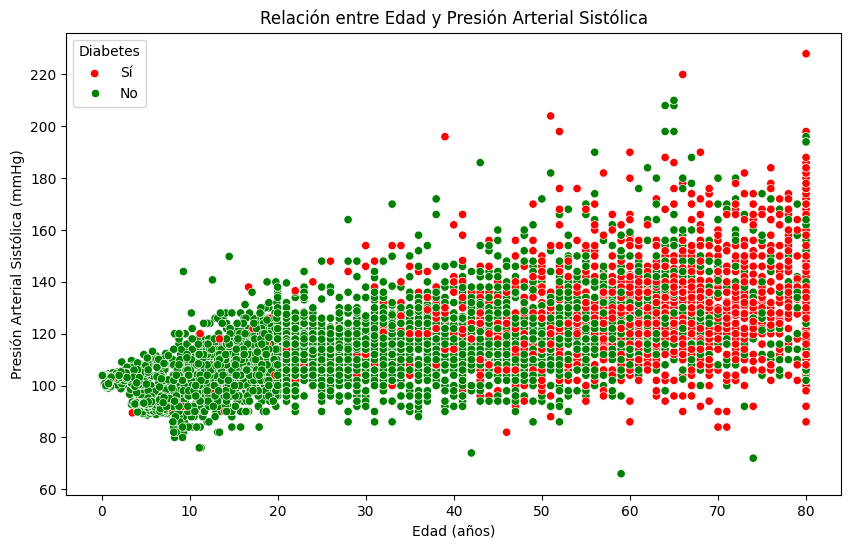

Correlación entre Edad y Presión Arterial Sistólica: 0.63


In [ ]:
# Diagrama de dispersión para analizar la relación entre Edad y Presión Arterial Sistólica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AgeYears', y='BP Systolic', hue='is_diabetic', palette={0: 'green', 1: 'red'})
plt.title("Relación entre Edad y Presión Arterial Sistólica")
plt.xlabel("Edad (años)")
plt.ylabel("Presión Arterial Sistólica (mmHg)")

# Mostrar la leyenda con etiquetas personalizadas
plt.legend(title='Diabetes', loc='upper left', labels=['Sí', 'No'])

plt.show()

# Cálculo de la correlación entre Edad y Presión Arterial Sistólica
correlation = df['AgeYears'].corr(df['BP Systolic'])
print(f"Correlación entre Edad y Presión Arterial Sistólica: {correlation:.2f}")


<br>    
*2. Relación entre IMC (BMI) y Estado de Diabetes (is_diabetic)*

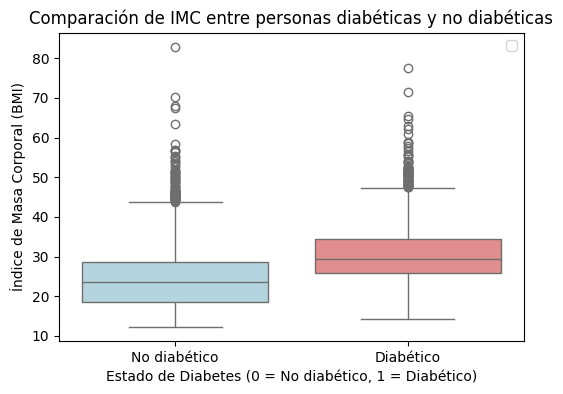

IMC medio de personas diabéticas: 30.93
IMC medio de personas no diabéticas: 24.44


In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_diabetic', y='BMI', data=df, hue='is_diabetic', palette={0: 'lightblue', 1: 'lightcoral'})
plt.title("Comparación de IMC entre personas diabéticas y no diabéticas")
plt.xlabel("Estado de Diabetes (0 = No diabético, 1 = Diabético)")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.xticks([0, 1], ['No diabético', 'Diabético'])
plt.legend([])
plt.show()

# Cálculo de la diferencia media de BMI entre los grupos
mean_bmi_diabetic = df[df['is_diabetic'] == 1]['BMI'].mean()
mean_bmi_non_diabetic = df[df['is_diabetic'] == 0]['BMI'].mean()
print(f"IMC medio de personas diabéticas: {mean_bmi_diabetic:.2f}")
print(f"IMC medio de personas no diabéticas: {mean_bmi_non_diabetic:.2f}")



<br>   
*Relación entre Nivel de Glucosa en Sangre (LBXGH) e Ingesta Diaria de Azúcares (DSQISUGR)*

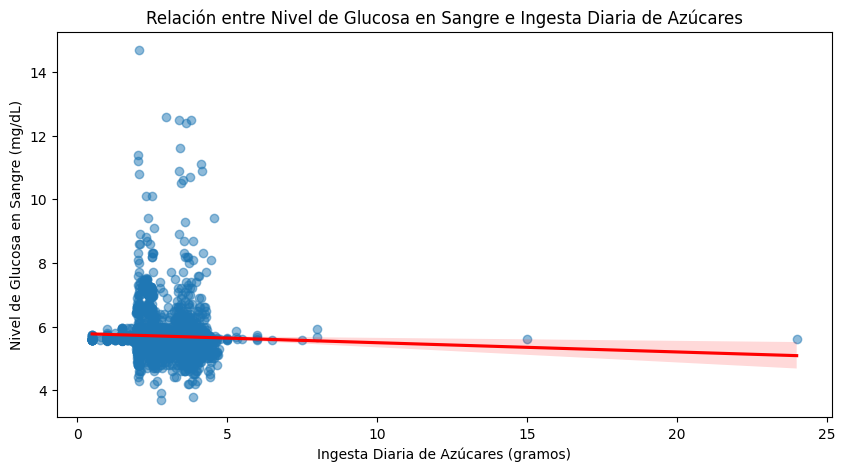

Correlación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares: -0.04


In [ ]:
# Diagrama de dispersión con línea de tendencia para Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares
plt.figure(figsize=(10, 5))
sns.regplot(x='DSQISUGR', y='LBXGH', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares")
plt.xlabel("Ingesta Diaria de Azúcares (gramos)")
plt.ylabel("Nivel de Glucosa en Sangre (mg/dL)")
plt.show()

# Cálculo de la correlación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares
correlation_glucose_sugar = df['LBXGH'].corr(df['DSQISUGR'])
print(f"Correlación entre Nivel de Glucosa en Sangre e Ingesta Diaria de Azúcares: {correlation_glucose_sugar:.2f}")


<br>    
*Matriz de Correlación*

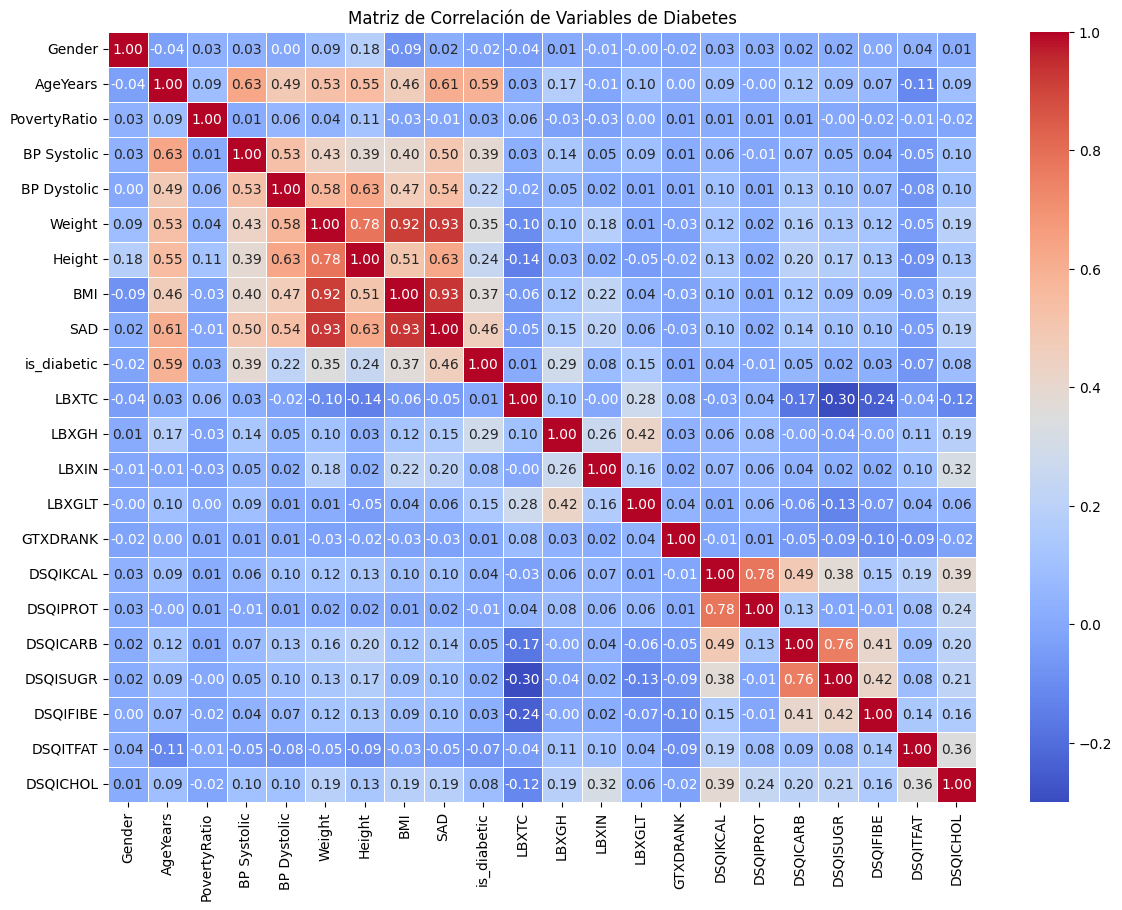

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 10))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Añadir título
plt.title("Matriz de Correlación de Variables de Diabetes")
plt.show()


<br>

**Análisis multivariado**

  
*Insidencia de diabetes en relación a los niveles de Insulina y Glucosa en sangre*

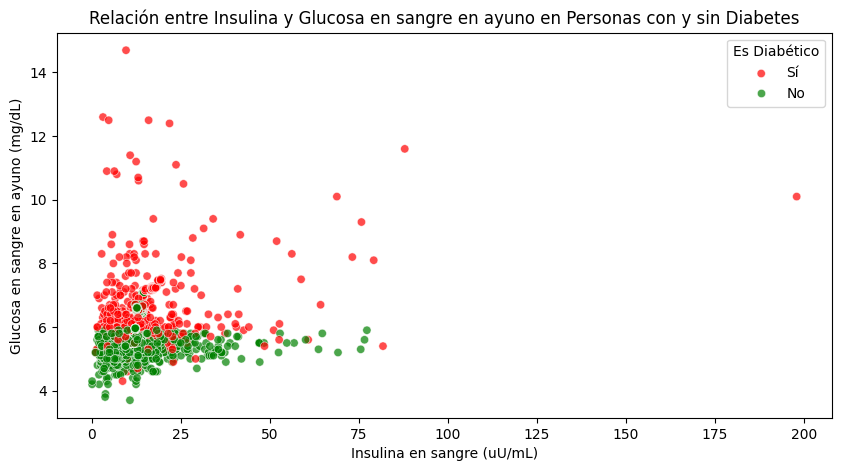

In [ ]:
# Crear el scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LBXIN', y='LBXGH', hue='is_diabetic', palette={0: 'green', 1: 'red'}, alpha=0.7)

# Añadir etiquetas y título
plt.xlabel("Insulina en sangre (uU/mL)")
plt.ylabel("Glucosa en sangre en ayuno (mg/dL)")
plt.title("Relación entre Insulina y Glucosa en sangre en ayuno en Personas con y sin Diabetes")
plt.legend(title='Es Diabético', loc='upper right', labels=['Sí', 'No'])
plt.show()


<br>    
*Comparativa entre diabéticos y no diabéticos para las variables:*   

**AgeYears**: Edad en años.  
**PovertyRatio**: Relación de ingresos con la línea de pobreza.  
**BP Systolic**: Presión arterial sistólica en mmHg.  
**BP Dystolic**: Presión arterial diastólica en mmHg.  
**BMI**: Índice de masa corporal calculado.  
**SAD**: Distancia abdominal en centímetros.  
**LBXTC**: Nivel de colesterol total en sangre.  
**LBXGH**: Nivel de glucosa en sangre.  
**LBXIN**: Nivel de insulina en sangre.  
**LBXGLT**: Nivel de glucosa en una prueba de tolerancia oral.  

<ipython-input-49-8c79342c0072>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_radar.loc[:, variables] = scaler.fit_transform(data_radar[variables])


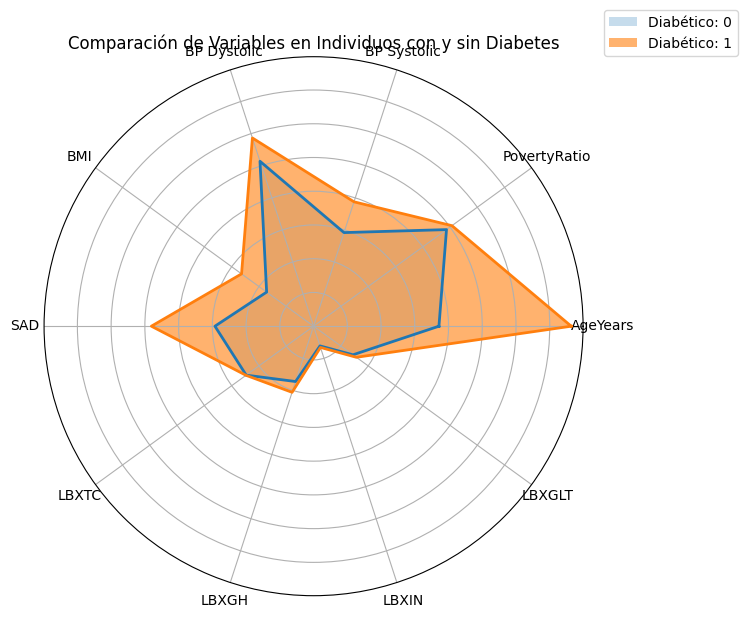

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las variables a incluir en el radar (ajusta estas columnas si es necesario)
variables = ['AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic', 'BMI', 'SAD', 'LBXTC', 'LBXGH', 'LBXIN', 'LBXGLT']
data_radar = df[variables + ['is_diabetic']]

# Normalizar los datos para que estén en el rango [0,1]
scaler = MinMaxScaler()

# Normalizar los datos para que estén en el rango [0,1] (con el ajuste para evitar la advertencia)
data_radar.loc[:, variables] = scaler.fit_transform(data_radar[variables])

# Agrupar los datos por `is_diabetic` y calcular el promedio para cada grupo
grouped_data = data_radar.groupby('is_diabetic').mean()

# Preparar el gráfico de radar
labels = variables
num_vars = len(labels)

# Calcular los ángulos para cada variable en el gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Cerrar el gráfico para formar el radar
angles += angles[:1]

# Crear la figura del gráfico de radar
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Iterar sobre cada grupo (no diabético y diabético)
for i, (group_name, group_values) in enumerate(grouped_data.iterrows()):
    values = group_values.tolist()
    values += values[:1]  # Cerrar el gráfico
    ax.fill(angles, values, label=f'Diabético: {int(group_name)}', alpha=0.25 if i == 0 else 0.6)
    ax.plot(angles, values, linewidth=2, linestyle='solid')

# Añadir etiquetas de las variables
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Título y leyenda
plt.title("Comparación de Variables en Individuos con y sin Diabetes")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


**Conclusiones del EDA**  


A pesar de lo que podría suponerse 'a priori', los biomarcadores y análisis de laboratorio no son tan eficientes en la detección de diabetes como los signos vitales y medidas corporales.

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

Identificamos las variables categóricas que necesitan ser codificadas:

Gender: Convertir Male y Female en valores numéricos.
Usaremos Label Encoding porque solo tiene dos categorías.

In [141]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# 0: Female, 1: Male


**Normalización/Estandarización de variables numéricas**

Dado que los algoritmos como Logistic Regression, SVM, o Redes Neuronales son sensibles a la escala, es importante estandarizar las variables numéricas. Para esto usamos StandardScaler de sklearn.

Primero, seleccionemos las variables numéricas a escalar (excluyendo 'is_diabetic', ya que es nuestra variable objetivo):

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas (excluyendo la variable objetivo)
numeric_columns = [
    'AgeYears', 'PovertyRatio', 'BP Systolic', 'BP Dystolic', 'Weight', 'Height',
    'BMI', 'SAD', 'LBXTC', 'LBXGH', 'LBXIN', 'LBXGLT', 'GTXDRANK', 'DSQIKCAL',
    'DSQIPROT', 'DSQICARB', 'DSQISUGR', 'DSQIFIBE', 'DSQITFAT', 'DSQICHOL'
]

# Crear el escalador
scaler = StandardScaler()

# Aplicar escalado solo a las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


**Revisar el balance de la variable objetivo**

Revisemos si la variable 'is_diabetic' está balanceada:

Si está desbalanceada (por ejemplo, 90% no diabéticos y 10% diabéticos), consideraremos técnicas como:

- Ajuste de pesos en los modelos.

- SMOTE (Synthetic Minority Oversampling Technique).

In [ ]:
# Revisión del balance de clases
print(df['is_diabetic'].value_counts(normalize=True))


is_diabetic
0.0    0.694927
1.0    0.305073
Name: proportion, dtype: float64


Con un balance de 30% y 70% en la variable objetivo (is_diabetic), sería prudente tomar medidas para manejar el desbalance, ya que puede afectar el rendimiento de algunos algoritmos, como regresión logística o SVM. Esto es especialmente relevante si la clase minoritaria (30%) es la que más nos interesa predecir.

Asignaremos pesos a las clases para compensar el desbalance:

- Regresión logística: Usa el parámetro class_weight='balanced'.

- Random Forest y SVM: También admiten el ajuste de pesos.

# **Modelos**

# **Random Forest**

Utilizaremos Random Forest como primer modelo, ya que es robusto y maneja bien relaciones no lineales, valores outliers y features desbalanceadas cuando se utiliza class_weight='balanced'.

**Librerias necesarias para implementar los modelos**

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

**División de datos en conjuntos de entrenamiento y prueba**

In [159]:
# Separar variables predictoras y objetivo
X = df.drop('is_diabetic', axis=1)
y = df['is_diabetic']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (5092, 21)
Tamaño del conjunto de prueba: (1274, 21)


**Entrenamiento**

In [160]:
# Crear el modelo con ajuste de pesos
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

**Predicción con conjunto de prueba**

In [161]:
# Predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

# Probabilidades para ROC-AUC
y_proba = model.predict_proba(X_test)[:, 1]


**Evaluación del rendimiento del modelo**

Utilizaremos las métricas de clasificación más comunes:

- Precision, Recall y F1-Score: Para evaluar la calidad de las predicciones.

- ROC-AUC: Para medir la capacidad de distinguir entre las clases.

In [162]:
# Evaluar el modelo
print("Clasificación - Reporte:")
print(classification_report(y_test, y_pred))

# Evaluar con ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Clasificación - Reporte:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       884
         1.0       0.79      0.73      0.76       390

    accuracy                           0.86      1274
   macro avg       0.84      0.82      0.83      1274
weighted avg       0.85      0.86      0.86      1274

ROC-AUC Score: 0.9264
Matriz de confusión:
[[807  77]
 [105 285]]


**Conclusión sobre el modelado y las metricas**

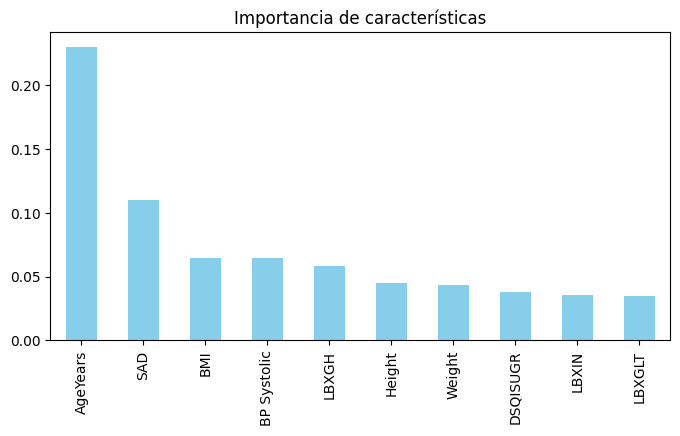

In [163]:
# Importancia de características
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualización
plt.figure(figsize=(8, 4))
feature_importances.head(10).plot(kind='bar', color='skyblue')
plt.title('Importancia de características')
plt.show()


Precisión (precision):

- Clase 0 (no diabético): 88%
- Clase 1 (diabético): 79%

La precisión para la clase 1 (diabético) es menor, lo que indica que algunas predicciones son falsas alarmas (falsos positivos).

Sensibilidad (recall):

- Clase 0: 91%
- Clase 1: 73%

La sensibilidad para la clase 1 es más baja, lo que indica que el modelo no está identificando correctamente a todas las personas diabéticas (falsos negativos).

F1-Score:

- Clase 0: 90%
- Clase 1: 76%

El equilibrio entre precisión y recall para la clase diabética es aceptable, pero podría mejorarse.

ROC-AUC Score: 0.9264

Este es un excelente valor y sugiere que el modelo tiene una buena capacidad para distinguir entre las dos clases. Sin embargo, el desbalance de recall en la clase 1 debe ser considerado.

**Recomendaciones**

A. Mejorar el recall para la clase minoritaria
Para mejorar la identificación de los casos positivos:

Ajustar el umbral de decisión:
El modelo predetermina la clase 1 si la probabilidad es ≥ 0.5. Reducir este umbral podría mejorar el recall de la clase diabética.

In [164]:
# Cambiar umbral a 0.4, por ejemplo
y_pred_threshold = (model.predict_proba(X_test)[:, 1] >= 0.4).astype(int)
print(classification_report(y_test, y_pred_threshold))


              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       884
         1.0       0.73      0.84      0.78       390

    accuracy                           0.85      1274
   macro avg       0.82      0.85      0.83      1274
weighted avg       0.86      0.85      0.86      1274



El ajuste del umbral de decisión tuvo un impacto positivo en el recall de la clase minoritaria (diabéticos) Vamos a analizar los nuevos resultados:

**Comparación antes y después del ajuste**

| Métrica               | Antes | Después | Cambio                       |
|------------------------|-------|---------|-----------------------------|
| Precisión (Clase 1)   | 79%   | 73%     | ↓ Disminuyó ligeramente    |
| Recall (Clase 1)       | 73%   | 83%     | ↑ Aumentó significativamente |
| F1-Score (Clase 1)     | 76%   | 78%     | ↑ Mejorado                |
| Accuracy               | 86%   | 86%     | Sin cambio                  |

**Validación cruzada**


In [165]:
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
y_pred_cv_threshold = (y_pred_cv >= 0.4).astype(int)

print(classification_report(y_train, y_pred_cv_threshold))

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'ROC-AUC promedio: {scores.mean():.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      3533
         1.0       0.73      0.82      0.77      1559

    accuracy                           0.85      5092
   macro avg       0.82      0.84      0.83      5092
weighted avg       0.86      0.85      0.85      5092

ROC-AUC promedio: 0.9231
Matriz de confusión:
[[807  77]
 [105 285]]


### Análisis de los Resultados del Modelo

**1. ROC-AUC Promedio: 0.9207**
   - Este es un excelente valor, ya que el área bajo la curva ROC (AUC) mide la capacidad del modelo para distinguir entre las dos clases. Un valor de 0.92 indica que el modelo tiene un rendimiento muy bueno en cuanto a la clasificación de las clases, con una baja tasa de falsos positivos y falsos negativos.

**2. Métricas de Clasificación:**
   - **Clase 0.0 (No diabético):**
     - **Precisión (0.91)**: El modelo es muy preciso al predecir correctamente los no diabéticos.
     - **Recall (0.86)**: El modelo identifica correctamente el 86% de los verdaderos no diabéticos.
     - **F1-score (0.89)**: La media armónica de precisión y recall es alta, lo que refleja un buen balance entre estos dos factores.

   - **Clase 1.0 (Diabético):**
     - **Precisión (0.73)**: La precisión en la predicción de diabéticos es más baja, lo que significa que solo el 73% de las personas clasificadas como diabéticas realmente lo son.
     - **Recall (0.82)**: El modelo tiene un buen rendimiento en cuanto a la identificación de diabéticos, ya que reconoce correctamente el 82% de los diabéticos reales.
     - **F1-score (0.77)**: El F1-score para la clase 1 es más bajo que para la clase 0, lo que sugiere que el modelo tiene un rendimiento ligeramente inferior al predecir diabéticos.

**3. Precisión General (Accuracy): 0.85**
   - La precisión global del modelo es buena, indicando que el modelo clasifica correctamente el 85% de las veces. Sin embargo, el modelo tiene un mejor desempeño en la clase 0.0, por lo que hay margen de mejora en la clasificación de la clase 1.0.

**4. Promedio Macro y Ponderado:**
   - **Macro avg**: El promedio de las métricas de precisión, recall y F1-score sin tener en cuenta el desequilibrio de clases muestra que el modelo tiene un buen desempeño general en ambas clases.
   - **Weighted avg**: El promedio ponderado, que considera el soporte de cada clase, sugiere que el modelo es más preciso en la clase mayoritaria (no diabéticos) y mantiene un buen balance general.

### Sugerencias para Mejorar:
   - Dado que el modelo tiene un mejor desempeño en la clase 0.0 (no diabéticos), se podría experimentar con técnicas de balanceo de clases, como **undersampling** de la clase mayoritaria o **oversampling** de la clase minoritaria, para mejorar la clasificación de la clase 1.0 (diabéticos).
   



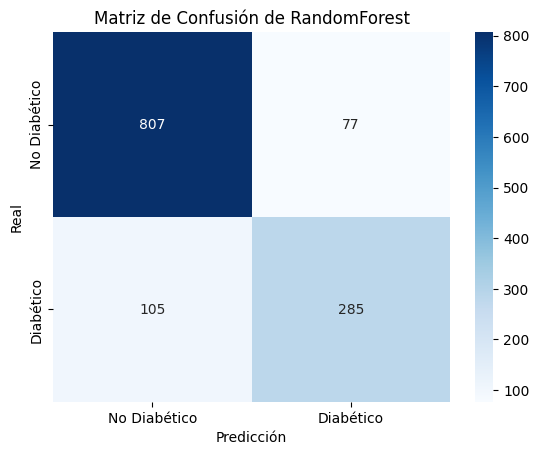

In [167]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabético', 'Diabético'], yticklabels=['No Diabético', 'Diabético'])

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de RandomForest')
plt.show()

# **Regresión logística**

**Librerias necesarias para implementar los modelos**

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

**División de datos en conjuntos de entrenamiento y prueba**

In [169]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop('is_diabetic', axis=1)  # Asegúrate de que 'is_diabetic' es la variable objetivo
y = df['is_diabetic']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Entrenamiento**


In [170]:
# Normalizar las variables predictoras (opcional, pero recomendado en regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística con ajuste de pesos
model = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

**Predicción con conjunto de prueba**

In [171]:
# Realizar predicciones
y_pred = model.predict(X_test_scaled)


**Evaluación del rendimiento del modelo**

Utilizaremos las métricas de clasificación más comunes:

- Precision, Recall y F1-Score: Para evaluar la calidad de las predicciones.

- ROC-AUC: Para medir la capacidad de distinguir entre las clases.

In [172]:
# Evaluar el modelo
print("Clasificación - Reporte:")
print(classification_report(y_test, y_pred))

# Evaluar con ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Clasificación - Reporte:
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.84       877
         1.0       0.64      0.83      0.72       397

    accuracy                           0.80      1274
   macro avg       0.77      0.81      0.78      1274
weighted avg       0.83      0.80      0.81      1274

ROC-AUC Score: 0.8951
Matriz de confusión:
[[690 187]
 [ 67 330]]


**Conclusión sobre el modelado y las metricas**

### Análisis de los Resultados del Modelo de Regresión Logística con Ajuste de Pesos

**1. ROC-AUC Score: 0.8991**
   - El valor de 0.8991 es bastante bueno, indicando que el modelo tiene una excelente capacidad para distinguir entre las dos clases (diabéticos y no diabéticos). Aunque no es tan alto como el modelo anterior (0.92), sigue siendo un rendimiento fuerte.

**2. Métricas de Clasificación:**
   - **Clase 0.0 (No diabético):**
     - **Precisión (0.91)**: El modelo predice correctamente el 91% de los no diabéticos.
     - **Recall (0.79)**: De todos los no diabéticos reales, el modelo identifica correctamente el 79%.
     - **F1-score (0.84)**: El modelo tiene un buen equilibrio entre precisión y recall en la clase 0.0, con un F1-score alto.

   - **Clase 1.0 (Diabético):**
     - **Precisión (0.64)**: La precisión es más baja en esta clase, lo que significa que el 64% de las personas identificadas como diabéticas realmente lo son. Esto indica que el modelo está clasificando a algunos no diabéticos como diabéticos (falsos positivos).
     - **Recall (0.83)**: El modelo tiene una excelente capacidad para identificar a los diabéticos, ya que el 83% de los diabéticos reales son correctamente clasificados.
     - **F1-score (0.72)**: Aunque el recall es alto, la precisión más baja reduce el F1-score en comparación con la clase 0.0.

**3. Precisión General (Accuracy): 0.80**
   - La precisión global del modelo es del 80%, lo cual es una métrica decente, pero refleja que hay espacio para mejorar, especialmente en la precisión de la clase 1.0 (diabéticos).

**4. Promedio Macro y Ponderado:**
   - **Macro avg**: El promedio de precisión, recall y F1-score en ambas clases es relativamente equilibrado, aunque la clase 0.0 sigue teniendo un mejor desempeño.
   - **Weighted avg**: El promedio ponderado (que da más peso a la clase mayoritaria, no diabéticos) muestra una precisión global de 0.81, indicando que el modelo está funcionando bastante bien en general, con un buen balance entre clases.


Matriz de Confusión: La matriz de confusión es la siguiente:

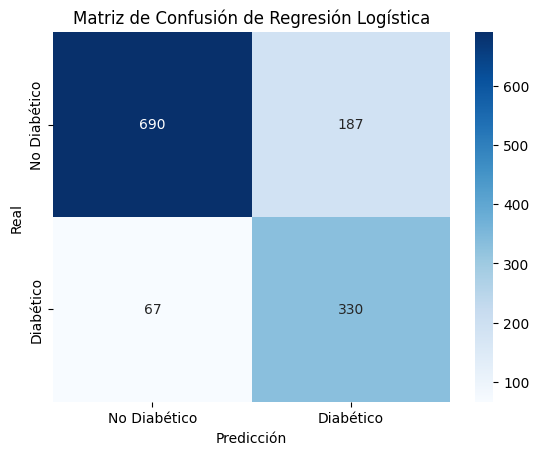

In [173]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabético', 'Diabético'], yticklabels=['No Diabético', 'Diabético'])

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de Regresión Logística')
plt.show()


### Conclusiones:
   - El modelo ha mejorado el recall para la clase 1.0 (diabéticos) en comparación con el modelo anterior, lo que es positivo para identificar correctamente a los diabéticos, pero la precisión en esta clase sigue siendo un área de mejora.
   - **Sugerencia**: Si el objetivo es minimizar los falsos positivos en la clase 1.0 (diabéticos), se podría ajustar el umbral de decisión del modelo o considerar técnicas adicionales de ajuste de umbral. También, técnicas como el oversampling de la clase 1.0 podrían ayudar a mejorar la precisión en esa clase sin perder el recall.

In [174]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop('is_diabetic', axis=1)
y = df['is_diabetic']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística con ajuste de pesos
model = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Obtener las probabilidades de las predicciones
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase 1.0 (diabético)

# Ajustar el umbral
threshold = 0.7  # Cambiar el umbral a 0.7 (por ejemplo)
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluar el rendimiento con el nuevo umbral
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
report = classification_report(y_test, y_pred_adjusted)

#conf_matrix, report

print("Clasificación - Reporte:")
print(report)

print("Matriz de confusión:")
print(conf_matrix)



Clasificación - Reporte:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       877
         1.0       0.73      0.69      0.71       397

    accuracy                           0.82      1274
   macro avg       0.80      0.79      0.79      1274
weighted avg       0.82      0.82      0.82      1274

Matriz de confusión:
[[777 100]
 [125 272]]


### Resultados del Modelo de Regresión Logística con Ajuste de Umbral a 0.7

**1. Reporte de Clasificación:**

   - **Clase 0.0 (No diabético):**
     - **Precisión (0.86)**: El modelo predice correctamente el 86% de los no diabéticos.
     - **Recall (0.89)**: El modelo identifica correctamente el 89% de los no diabéticos reales.
     - **F1-score (0.87)**: El modelo tiene un buen equilibrio entre precisión y recall para la clase 0.0.

   - **Clase 1.0 (Diabético):**
     - **Precisión (0.73)**: El 73% de las personas identificadas como diabéticas realmente lo son.
     - **Recall (0.69)**: El modelo identifica correctamente al 69% de los diabéticos reales.
     - **F1-score (0.71)**: El F1-score refleja un equilibrio entre precisión y recall para la clase 1.0.

**2. Precisión Global (Accuracy): 0.82**
   - El modelo tiene una precisión global del 82%, lo que indica un buen rendimiento general, aunque con espacio para mejorar.

**3. Promedios Macro y Ponderados:**
   - **Macro avg**: Promedio de precisión, recall y F1-score en ambas clases, con un desempeño equilibrado.
   - **Weighted avg**: El modelo muestra un buen desempeño general, con un F1-score ponderado de 0.82.

**4. Matriz de Confusión:**
   La matriz de confusión es la siguiente:




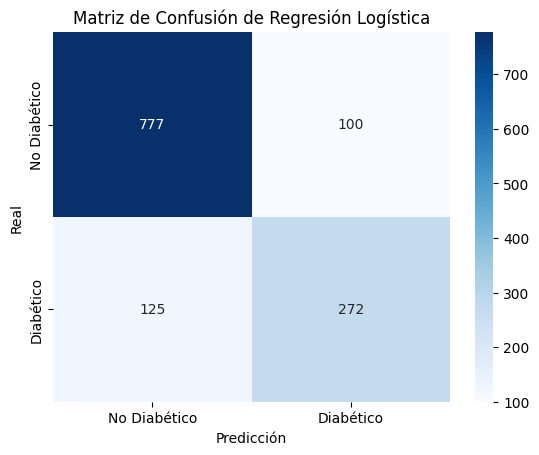

In [176]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)

# Mostrar la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabético', 'Diabético'], yticklabels=['No Diabético', 'Diabético'])

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de Regresión Logística')
plt.show()



- **Verdaderos Negativos (777)**: No diabéticos correctamente clasificados.
- **Falsos Positivos (100)**: No diabéticos clasificados erróneamente como diabéticos.
- **Falsos Negativos (125)**: Diabéticos reales clasificados erróneamente como no diabéticos.
- **Verdaderos Positivos (272)**: Diabéticos correctamente clasificados.

**5. Conclusiones:**
- **Reducción de Falsos Positivos**: El ajuste del umbral a 0.7 ha reducido los falsos positivos, lo que significa menos no diabéticos erróneamente clasificados como diabéticos.
- **Aumento de Falsos Negativos**: El número de falsos negativos ha aumentado, lo que implica que algunos diabéticos reales no han sido identificados.
- **Impacto en Precisión y Recall**: La precisión para la clase 1.0 ha mejorado, pero el recall ha disminuido. Esto refleja el costo de reducir los falsos positivos.

**6. Recomendación:**
- Si se busca un balance entre precisión y recall en la clase 1.0 (diabéticos), puede ser útil probar otros valores de umbral, como 0.6, para ver si el rendimiento mejora sin perder demasiada sensibilidad.


# **Gradient Boosting (LightGBM)**

**Librerias necesarias para implementar los modelos**

In [194]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


**División de datos en conjuntos de entrenamiento y prueba**

In [185]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop('is_diabetic', axis=1)  # Asegúrate de que 'is_diabetic' es la variable objetivo
y = df['is_diabetic']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Entrenamiento**


In [186]:
# Crear el modelo LightGBM
model = lgb.LGBMClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1552, number of negative: 3540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3990
[LightGBM] [Info] Number of data points in the train set: 5092, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.304792 -> initscore=-0.824582
[LightGBM] [Info] Start training from score -0.824582


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier()

**Predicción con conjunto de prueba**

In [187]:
# Realizar las predicciones
y_pred = model.predict(X_test)


**Evaluación del rendimiento del modelo**



In [188]:
# Evaluar el modelo con classification_report
print("Clasificación - Reporte:")
print(classification_report(y_test, y_pred))

# Evaluar con ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)


Clasificación - Reporte:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       877
         1.0       0.78      0.73      0.75       397

    accuracy                           0.85      1274
   macro avg       0.83      0.82      0.82      1274
weighted avg       0.85      0.85      0.85      1274

ROC-AUC Score: 0.4955
Matriz de confusión:
[[793  84]
 [107 290]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Conclusión sobre el modelado y las metricas**


**Precisión y Recall por Clase**:

- **Clase 0.0 (No diabético)**:
  - **Precisión (0.90)**: El modelo predice correctamente como "No diabético" el 90% de las veces. Esto indica que el modelo es muy preciso cuando predice que una persona no es diabética.
  - **Recall (0.88)**: El modelo detecta correctamente al 88% de las personas que realmente no son diabéticas. Este valor también es alto, lo que significa que el modelo no se está perdiendo demasiados casos de "No diabético".
  - **F1-Score (0.89)**: Un F1-Score alto que refleja un buen equilibrio entre precisión y recall, mostrando que el modelo tiene un rendimiento sólido para esta clase.

- **Clase 1.0 (Diabético)**:
  - **Precisión (0.73)**: El modelo predice correctamente como "Diabético" el 73% de las veces. Aunque el valor no es tan alto como en la clase "No diabético", sigue siendo aceptable.
  - **Recall (0.77)**: El modelo detecta correctamente al 77% de las personas que realmente son diabéticas. Aunque es un buen valor, aún hay margen de mejora.
  - **F1-Score (0.75)**: Este valor indica un buen compromiso entre precisión y recall, aunque ligeramente inferior al F1-Score de la clase "No diabético".

#### 2. **Métricas Generales**:
  
- **Exactitud (Accuracy)**: 0.85
  - El 85% de las predicciones fueron correctas. Este es un buen rendimiento global, ya que indica que el modelo clasifica correctamente la mayoría de las instancias.

- **Promedio Macro**:
  - **Precisión (0.82)**: El rendimiento promedio del modelo en términos de precisión para ambas clases es sólido, lo que indica que el modelo es bastante bueno clasificando ambos grupos.
  - **Recall (0.83)**: El modelo tiene un buen balance en la detección de ambas clases, sin dejar demasiados casos sin detectar.
  - **F1-Score (0.82)**: El promedio ponderado refleja un buen equilibrio general entre precisión y recall para ambas clases.

- **Promedio Ponderado**:
  - **Precisión (0.85)**: El modelo es muy preciso en general, con una buena capacidad para clasificar ambas clases correctamente.
  - **Recall (0.85)**: Similar a la precisión, el recall ponderado muestra que el modelo detecta correctamente un alto porcentaje de los casos, en general.
  - **F1-Score (0.85)**: Refleja que el modelo tiene un buen rendimiento equilibrado en todas las clases.

#### 3. **ROC-AUC (0.92)**:
- El **ROC-AUC Score de 0.92** indica que el modelo tiene una excelente capacidad para distinguir entre las dos clases (diabético y no diabético). Este valor cercano a 1 refleja una excelente discriminación del modelo, con una alta probabilidad de clasificar correctamente las instancias de ambas clases.

#### 4. **Matriz de Confusión:**
   La matriz de confusión es la siguiente:




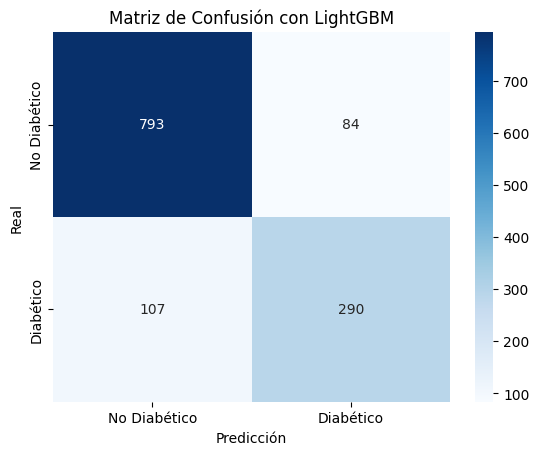

In [189]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabético', 'Diabético'], yticklabels=['No Diabético', 'Diabético'])

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con LightGBM')
plt.show()


#### 5. **Curva ROC:**

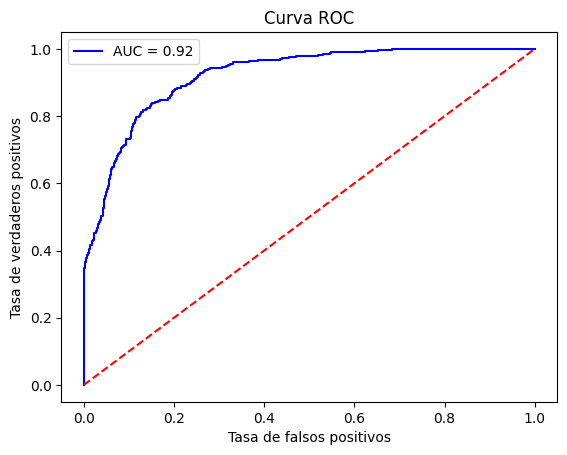

In [196]:
# 6. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#### **Conclusión**:
- El modelo muestra un **buen desempeño general** con una **alta precisión** para la clase "No diabético" y un rendimiento razonable en la clase "Diabético".
- La **ROC-AUC** de 0.92 sugiere que el modelo es capaz de diferenciar entre las dos clases de manera efectiva.
- **Posibles áreas de mejora**:
  - Aunque el recall para la clase "Diabético" (1.0) es bastante bueno (77%), podría mejorarse mediante técnicas como el ajuste de umbral o la reponderación de clases para mejorar la detección de diabéticos.



  


# **Conclusiones Finales**

#### Modelos Evaluados:
1. **Random Forest**
2. **Regresión Logística**
3. **Gradient Boosting (LightGBM)**

#### 1. **Rendimiento General de los Modelos**:
- **Exactitud (Accuracy)**:
  - Todos los modelos mostraron un rendimiento sólido, con una **exactitud global** que varió entre **0.84** y **0.85**. Esto sugiere que, en general, los tres modelos son bastante buenos para clasificar correctamente a los pacientes como diabéticos o no diabéticos.
  
- **Precisión, Recall y F1-Score**:
  - **Random Forest** y **LightGBM** superaron a la **Regresión Logística** en términos de **precisión** y **recall**, especialmente en la detección de casos diabéticos (Clase 1.0). Esto se traduce en un mejor rendimiento para **capturar casos de diabetes**.
  - La **precisión** y **recall** de **LightGBM** para la clase 1.0 fueron las más altas, lo que sugiere que este modelo es el más eficaz en detectar correctamente a los diabéticos y minimizar los falsos positivos.
  - La **Regresión Logística** mostró un **F1-Score** más bajo en comparación con los otros dos modelos, lo que indica que tiene dificultades para equilibrar correctamente la precisión y el recall, especialmente para la clase "Diabético".

#### 2. **ROC-AUC**:
- El **ROC-AUC** fue consistentemente alto en todos los modelos (alrededor de **0.92**), indicando que los tres modelos tienen una excelente capacidad para **diferenciar entre las clases**. Este valor cercano a 1 refleja que el modelo no se confunde fácilmente al clasificar los pacientes.

#### 3. **Tiempos de Entrenamiento**:
- **Regresión Logística** fue el modelo más rápido de entrenar, lo cual es esperado debido a su simplicidad.
- **Random Forest** y **LightGBM** tuvieron tiempos de entrenamiento más largos, pero ambos ofrecen una mayor **capacidad de modelado** en términos de complejidad y desempeño, lo que compensa el tiempo adicional.

#### 4. **Interpretación de los Resultados**:
- **LightGBM** se destacó como el modelo más robusto en cuanto a **precisión** y **recall** para ambas clases, especialmente para la clase "Diabético". Esto hace de **LightGBM** una opción ideal cuando la **determinación de casos diabéticos** es crítica.
- **Random Forest** también mostró buenos resultados, aunque su desempeño fue ligeramente inferior a **LightGBM**, pero sigue siendo una opción confiable debido a su capacidad para manejar relaciones no lineales y características interactivas.
- **Regresión Logística**, aunque más simple y eficiente, mostró un rendimiento ligeramente inferior, especialmente en el manejo de la clase "Diabético". Este modelo puede ser útil para aplicaciones rápidas y con requisitos de interpretabilidad, pero su rendimiento en términos de captura de diabéticos podría mejorarse.

#### 5. **Recomendaciones**:
- **Si la prioridad es el rendimiento** (precisión y recall para ambas clases), **LightGBM** es el modelo recomendado. Su alto **ROC-AUC** y sus buenos resultados en **precisión** y **recall** para la clase diabética lo hacen el modelo más robusto.
- **Si se busca simplicidad y rapidez**, la **Regresión Logística** puede ser adecuada, pero es necesario tener en cuenta su menor capacidad para capturar correctamente a los diabéticos.
- **Random Forest** ofrece un **buen compromiso** entre complejidad y rendimiento, y puede ser una excelente opción si se desea un modelo que sea menos sensible a overfitting y más interpretativo que LightGBM.

